In [1]:
# import useful packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Model Selection for Cross Validation
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
# Path to the Excel file containing the dataset of the bank
file_path = 'Base de données - SNI.xlsx'

# Load the Excel file into a Pandas DataFrame
df_risk = pd.read_excel(file_path)





## EDA

In [2]:
df=df_risk.copy()

In [3]:
df.head()

,numtiers,Annee,NUMTIERS_ANNEE,defaut,DATE_DE_CREATION_TIERS,DATE_DE_CREATION_ENTREP,CHIFFRE_AFFAIRES,EXCEDENT_BRUT_EXPLOITATION,RESULTAT_EXPlOITATION,RESULTAT_NET,...,NIVEAU_COMPETITIVITE,QUALITE_INFORMATION_FINANCIERE,REPUTATION,STRUCTUREDUMANAGEMENT,SUPPORT,POSITIONNEMENTMARCHE,Categorie_juridique,Cote en bourse,Appartenance a un groupe,Secteurs
0,5200000007513,2015,5200000007513_2015,0,2008-01-02,1982-01-05,236073240.2,8258201.71,7120503.00,-14040379.78,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Transport et Communication
1,5200000007513,2016,5200000007513_2016,0,2008-01-02,1982-01-05,258386615.0,4107268.85,2031311.93,2312466.82,...,Tres forte concurrence,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,0,Transport et Communication
2,5200000007934,2015,5200000007934_2015,0,1988-05-31,1953-08-05,202426475.2,5028464.60,3602225.77,-413273.04,...,Absence de concurrence (quasi monopole),Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Leader,SA,0,1,Industries agroalimentaires et du tabac
3,5200000007934,2017,5200000007934_2017,0,1988-05-31,1953-08-05,210917616.4,13076487.89,12514233.63,7501946.85,...,Forte presence de produits similaires et compe...,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur majeur + de 20% de part de marche,SA,0,1,Industries agroalimentaires et du tabac
4,5200000008051,2015,5200000008051_2015,0,1998-10-02,1995-05-22,171987524.1,16142629.85,12544851.82,1401029.14,...,Quelques competiteurs majeurs identifies,Etats comptables et financiers audites par un ...,Tres bonne,Bien structure,Support conforme aux attentes,Acteur non significatif,SA,0,1,"Commerce, reparations automobiles et d'article..."


In [4]:
# Understanding the type and content of the dataset
df.columns


Index(['numtiers', 'Annee', 'NUMTIERS_ANNEE', 'defaut',
       'DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP', 'CHIFFRE_AFFAIRES',
       'EXCEDENT_BRUT_EXPLOITATION', 'RESULTAT_EXPlOITATION', 'RESULTAT_NET',
       'FINANCEMENT_PERMANENT', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT',
       'CAPITAUX_PROPRES', 'TRESORIE_NETTE', 'TOTAL_BILAN', 'DETTE_FINANCIERE',
       'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'TOTAL_ACTIF', 'TOTAL_PASSIF',
       'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS',
       'AUTO_FINANCEMENT', 'FRAIS_FINANCIERS', 'STOCK',
       'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS',
       'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE',
       'Categorie_juridique', 'Cote en bourse', 'Appartenance a un groupe',
       'Secteurs'],
      dtype='object')

In [5]:
df.dtypes.value_counts().sort_values()

datetime64[ns]     2
int64              5
object            13
float64           20
Name: count, dtype: int64

# Financial ratios


In [6]:
# Calculation of financial ratios
# Liquidity Ratios
df['Ratio de Liquidité Générale'] = df['ACTIF_CIRCULANT'] / df['PASSIF_CIRCULANT']
# Asset Management Ratios
df['Rotation des Stocks'] = df['CHIFFRE_AFFAIRES'] / df['STOCK']
# Leverage Ratios
df['Ratio d''Endettement'] = df['DETTE_FINANCIERE'] / df['CAPITAUX_PROPRES']
# Profitability Ratios
df['Marge Nette'] = (df['RESULTAT_NET'] / df['CHIFFRE_AFFAIRES']) * 100
df['Taille_entreprise'] = np.log(df['CHIFFRE_AFFAIRES'])
df['Ratio_capacite_remboursement'] = df['EXCEDENT_BRUT_EXPLOITATION'] / df['FRAIS_FINANCIERS']
df['Liquidite_reduite'] = (df['ACTIF_CIRCULANT'] - df['STOCK']) / df['PASSIF_CIRCULANT']
df['Couverture_interets'] = df['EXCEDENT_BRUT_EXPLOITATION'] / df['FRAIS_FINANCIERS']
df['Ratio_autonomie'] = df['CAPITAUX_PROPRES'] / df['TOTAL_ACTIF']
df['ROE'] = (df['RESULTAT_NET'] / df['CAPITAUX_PROPRES']) * 100
df['ROA'] = (df['RESULTAT_NET'] / df['TOTAL_ACTIF']) * 100



In [7]:
# Create a copy of the DataFrame
df_nouveau = df.copy()
# Variables used to calculate the new variables
variables_à_éliminer = ['RESULTAT_NET', 'CAPITAUX_PROPRES', 'Appartenance a un groupe', 'Cote en bourse', 'RESULTAT_EXPlOITATION', 'FINANCEMENT_PERMANENT', 'CHIFFRE_AFFAIRES', 'DELAI_REGLEMENT_CLIENTS', 'DELAI_REGLEMENT_FOURNISSEURS', 'AUTO_FINANCEMENT', 'EXCEDENT_BRUT_EXPLOITATION', 'FRAIS_FINANCIERS', 'TOTAL_BILAN', 'TRESORIE_NETTE', 'FONDS_DE_ROULEMENT', 'BESOIN_FONDS_ROULEMENT', 'ACTIF_CIRCULANT', 'PASSIF_CIRCULANT', 'STOCK', 'DETTE_FINANCIERE', 'TOTAL_ACTIF', 'TOTAL_PASSIF', 'TRESORIE_NETTE']
df_nouveau.drop(columns=variables_à_éliminer, inplace=True)


In [8]:
df_nouveau.head()

,numtiers,Annee,NUMTIERS_ANNEE,defaut,DATE_DE_CREATION_TIERS,DATE_DE_CREATION_ENTREP,EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT,DIVERSITE_CLIENTS,DIVERSITE_FOURNISSEURS,IMPACT_SOCIAUX_ENVIRONNEMENTAL,...,Rotation des Stocks,Ratio dEndettement,Marge Nette,Taille_entreprise,Ratio_capacite_remboursement,Liquidite_reduite,Couverture_interets,Ratio_autonomie,ROE,ROA
0,5200000007513,2015,5200000007513_2015,0,2008-01-02,1982-01-05,Entre 5 et 10 ans,"Diversification tres forte par produits, clien...",Tres grande diversite,Impact social ou environnemental potentiel mai...,...,inf,0.001079,-5.947468,19.279653,0.589600,1.989460,0.589600,0.466445,-14.859481,-6.931124
1,5200000007513,2016,5200000007513_2016,0,2008-01-02,1982-01-05,Plus de 10 ans,"Diversification tres forte par produits, clien...",Tres grande diversite,Impact social ou environnemental marginal,...,inf,0.000000,0.894964,19.369968,0.858853,1.920346,0.858853,0.465513,2.388908,1.112068
2,5200000007934,2015,5200000007934_2015,0,1988-05-31,1953-08-05,Entre 5 et 10 ans,Diversification limitee e un seul client ou un...,Tres grande diversite,"Aucun impact social ou environnemental, soumis...",...,29.478712,0.000000,-0.204160,19.125887,2.920095,1.200954,2.920095,0.341939,-1.602681,-0.548020
3,5200000007934,2017,5200000007934_2017,0,1988-05-31,1953-08-05,Plus de 10 ans,"Diversification tres forte par produits, clien...",Tres grande diversite,"Aucun impact social ou environnemental, soumis...",...,27.787264,0.000000,3.556814,19.166978,8.536753,2.467023,8.536753,0.637867,17.191970,10.966188
4,5200000008051,2015,5200000008051_2015,0,1998-10-02,1995-05-22,Plus de 10 ans,"Diversification tres forte par produits, clien...",Tres grande diversite,"Aucun impact social ou environnemental, soumis...",...,11.345189,0.082027,0.814611,18.962932,2.533170,1.345074,2.533170,0.291359,2.746963,0.800352


In [9]:
# Check for missing values
missing_values = df_nouveau.isnull().sum()

# Check for duplicate rows
duplicate_rows = df_nouveau.duplicated().sum()

print("Missing Values:")
print(missing_values)

print("\nDuplicate Rows = ", duplicate_rows)

Missing Values:
numtiers                                   0
Annee                                      0
NUMTIERS_ANNEE                             0
defaut                                     0
DATE_DE_CREATION_TIERS                     0
DATE_DE_CREATION_ENTREP                    0
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT    0
DIVERSITE_CLIENTS                          0
DIVERSITE_FOURNISSEURS                     0
IMPACT_SOCIAUX_ENVIRONNEMENTAL             0
NIVEAU_COMPETITIVITE                       0
QUALITE_INFORMATION_FINANCIERE             0
REPUTATION                                 0
STRUCTUREDUMANAGEMENT                      0
SUPPORT                                    0
POSITIONNEMENTMARCHE                       0
Categorie_juridique                        0
Secteurs                                   0
Ratio de Liquidité Générale                0
Rotation des Stocks                        0
Ratio dEndettement                         1
Marge Nette                            

In [10]:
# Delete rows with missing values in the current DataFrame
df_nouveau.dropna(inplace=True)

In [11]:
# Check for missing values
missing_values = df_nouveau.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
numtiers                                   0
Annee                                      0
NUMTIERS_ANNEE                             0
defaut                                     0
DATE_DE_CREATION_TIERS                     0
DATE_DE_CREATION_ENTREP                    0
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT    0
DIVERSITE_CLIENTS                          0
DIVERSITE_FOURNISSEURS                     0
IMPACT_SOCIAUX_ENVIRONNEMENTAL             0
NIVEAU_COMPETITIVITE                       0
QUALITE_INFORMATION_FINANCIERE             0
REPUTATION                                 0
STRUCTUREDUMANAGEMENT                      0
SUPPORT                                    0
POSITIONNEMENTMARCHE                       0
Categorie_juridique                        0
Secteurs                                   0
Ratio de Liquidité Générale                0
Rotation des Stocks                        0
Ratio dEndettement                         0
Marge Nette                            

In [12]:
categories_features=list(df_nouveau.select_dtypes('O').columns)
numeric_features=list(df_nouveau.select_dtypes(('int64','float64')).columns)
time_features=list(df_nouveau.select_dtypes('datetime64').columns)

In [13]:
df_nouveau[categories_features].describe(include=['O']).T

,count,unique,top,freq
NUMTIERS_ANNEE,1517,1517,5200000007513_2015,1
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT,1517,4,Plus de 10 ans,1141
DIVERSITE_CLIENTS,1517,7,"Diversification tres forte par produits, clien...",1144
DIVERSITE_FOURNISSEURS,1517,6,Diversite moyenne,743
IMPACT_SOCIAUX_ENVIRONNEMENTAL,1517,6,"Aucun impact social ou environnemental, soumis...",1023
NIVEAU_COMPETITIVITE,1517,5,Quelques competiteurs majeurs identifies,920
QUALITE_INFORMATION_FINANCIERE,1517,4,Etats comptables et financiers audites par un ...,1445
REPUTATION,1517,5,Tres bonne,1080
STRUCTUREDUMANAGEMENT,1517,4,Bien structure,1369
SUPPORT,1517,5,Support conforme aux attentes,1236


### TARGET

In [14]:
set(df_nouveau.defaut)

{0, 1}

In [15]:
df_nouveau.defaut.isna().sum()


0

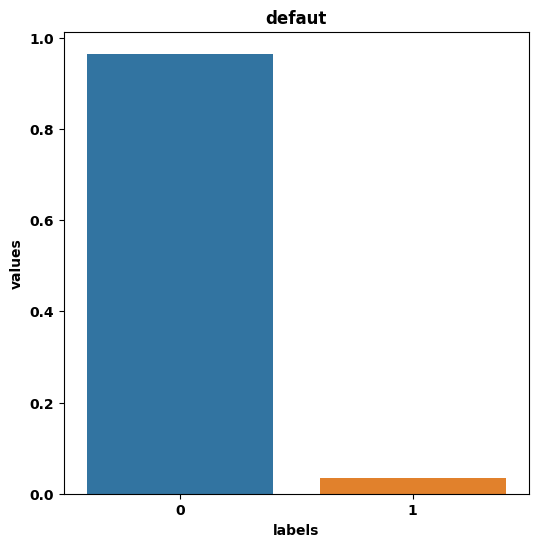

In [16]:
temp = df_nouveau["defaut"].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values/len(df_nouveau)
                  })
plt.figure(figsize = (6,6))
plt.title('defaut')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

Target ('defaut') take two levels: 0 wich mean the loan is repaid on time or 1 if not.From the barplot, we see unbalanced class problem ,we should deal with this problem before modeling.

#### DateTime features

In [17]:
pd.to_datetime(df_nouveau['DATE_DE_CREATION_ENTREP'],format='%D%M%Y')


0      1982-01-05
1      1982-01-05
2      1953-08-05
3      1953-08-05
4      1995-05-22
          ...    
1516   2012-11-28
1517   2015-08-25
1518   2013-02-28
1519   2006-08-31
1520   1990-12-21
Name: DATE_DE_CREATION_ENTREP, Length: 1517, dtype: datetime64[ns]

In [18]:
df_nouveau.DATE_DE_CREATION_ENTREP=df_nouveau.DATE_DE_CREATION_ENTREP.dt.year

In [19]:
df_nouveau.DATE_DE_CREATION_ENTREP.astype('int64')

0       1982
1       1982
2       1953
3       1953
4       1995
        ... 
1516    2012
1517    2015
1518    2013
1519    2006
1520    1990
Name: DATE_DE_CREATION_ENTREP, Length: 1517, dtype: int64

There is no clear pattern between DATE_DE_CREATION_ENTREP and the target but as the correlation is not null we will keep it now.

###  Numeric Features

Now let's deal with numerical features, showing distributions,detection anomalies and the most important the correlations.

#### correlations

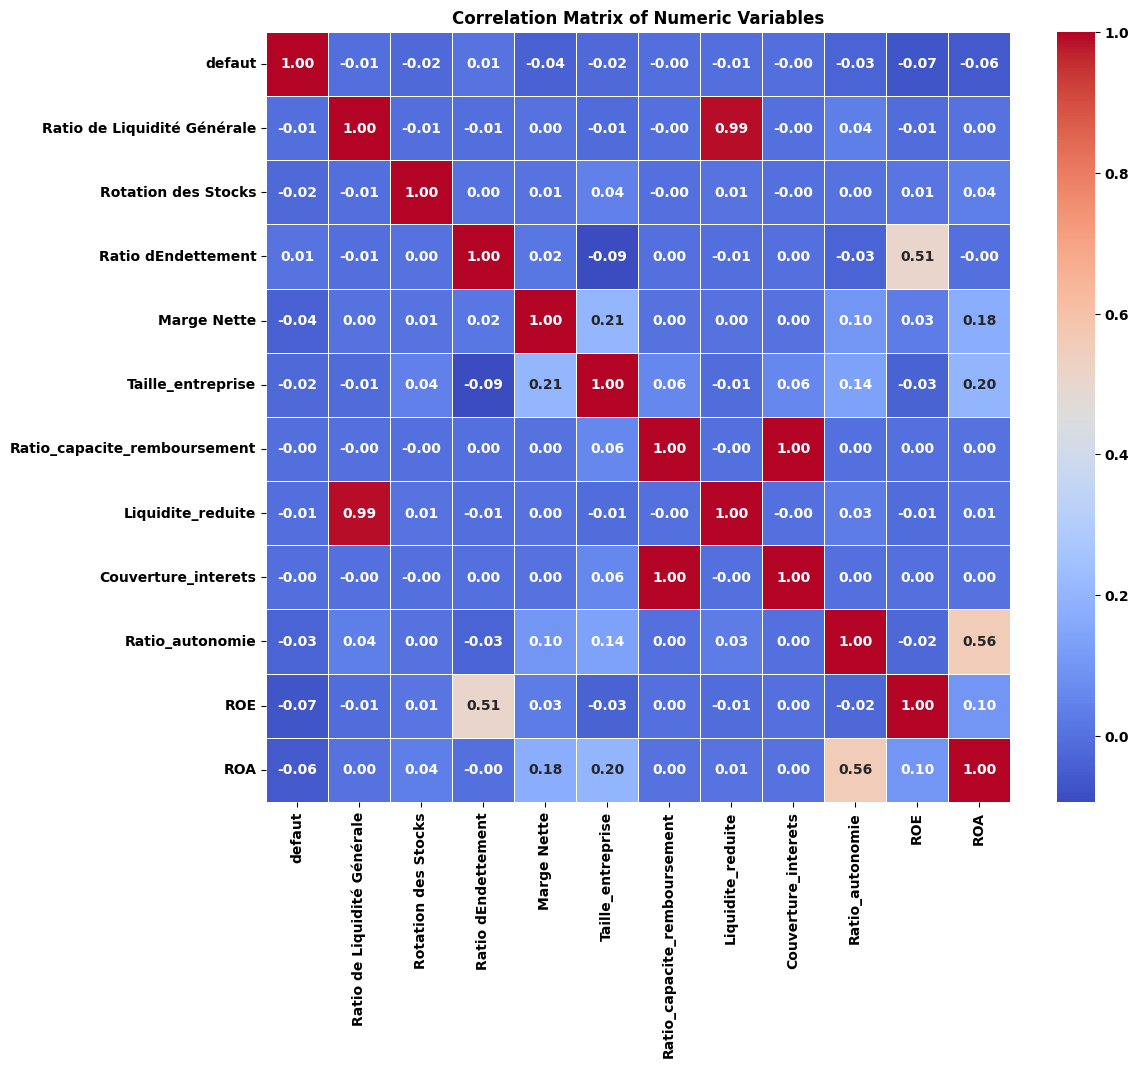

In [20]:
numeric_features = [col for col in numeric_features if col not in ["numtiers", "Annee"]]
# Calculate the correlation matrix
correlation_matrix = df_nouveau[numeric_features].corr()

# Display the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()


The corrplot shows strong correlation between features in the centre,this is helpfull in selecting usefull feature to built a model, but there is week correlation with the target which need to handle before modeling.

correlations with target are very week range(-0.03,0.02).We should not delete them they are usefull to predict in an applicant will repay or not, but transform them and perform feature extraction in order two build a strong model.

### Feature distribution

In [21]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution(var):

    i = 0
    t1 = df_nouveau.loc[df_nouveau['defaut'] != 0]
    t0 = df_nouveau.loc[df_nouveau['defaut'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(8,3,figsize=(16,64))

    for feature in var :
        i += 1
        plt.subplot(8,3,i)
        sns.kdeplot(t1[feature], bw=0.5,color='red',label="defaut = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="defaut = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<Figure size 640x480 with 0 Axes>

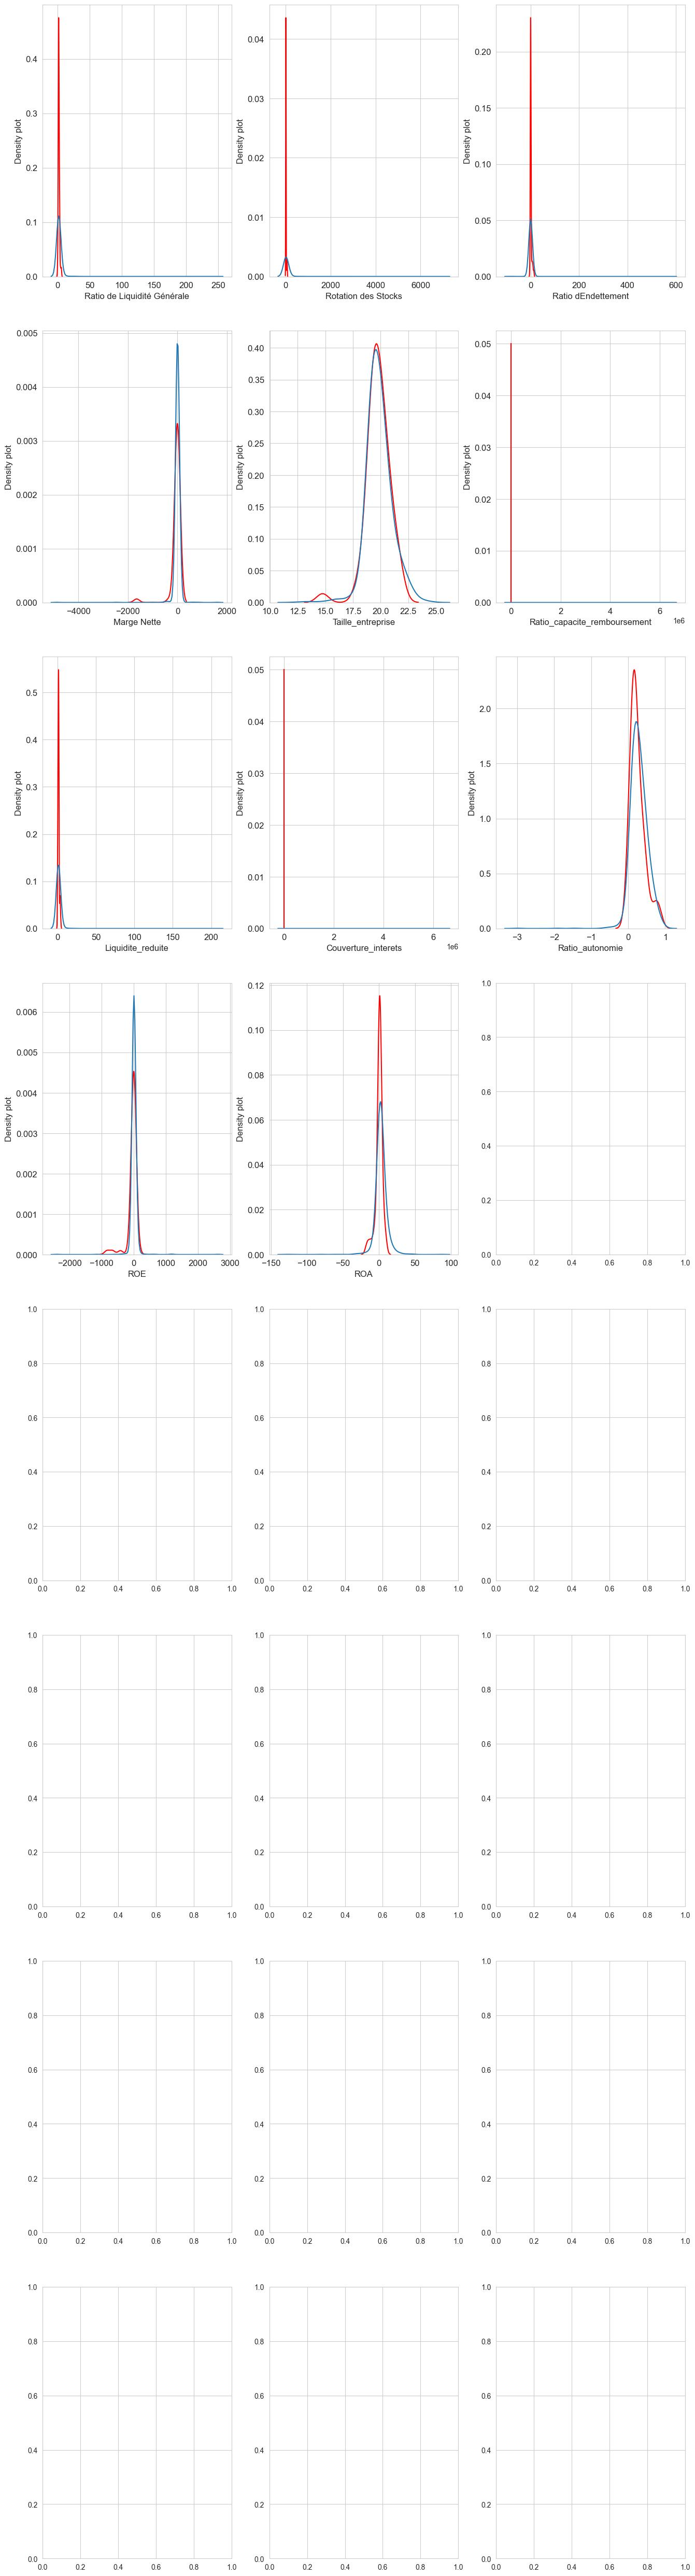

In [22]:
plot_distribution([i for i in numeric_features if i!='defaut'])

### Categorical Features

In [23]:
# Identify qualitative (categorical) columns based on data types
qualitative_columns = [column for column in df_nouveau.columns if df_nouveau[column].dtype == 'object']
print("Categorical variables = ", qualitative_columns)

# List to store dictionaries of categories and frequencies
category_frequency_list = []

# Iterate through qualitative columns
for column in qualitative_columns:
    unique_categories = df_nouveau[column].unique()
    for category in unique_categories:
        frequency = (df_nouveau[column] == category).sum()
        category_frequency_list.append({'Column': column, 'Category': category, 'Frequency': frequency})

# Create a DataFrame and sort in descending order of frequency under each column
category_frequency_df = pd.DataFrame(category_frequency_list)
category_frequency_df.sort_values(by=['Column', 'Frequency'], ascending=[True, False], inplace=True)

# Reset index for the final DataFrame
category_frequency_df.reset_index(drop=True, inplace=True)
category_frequency_df

Categorical variables =  ['NUMTIERS_ANNEE', 'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS', 'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL', 'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION', 'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE', 'Categorie_juridique', 'Secteurs']


,Column,Category,Frequency
0,Categorie_juridique,SA,1085
1,Categorie_juridique,SARL,428
2,Categorie_juridique,Autres forme juridique,4
3,DIVERSITE_CLIENTS,"Diversification tres forte par produits, clien...",1144
4,DIVERSITE_CLIENTS,Bonne diversification par produits mais limite...,311
...,...,...,...
1582,Secteurs,Activites financières,20
1583,Secteurs,Industries extractives,14
1584,Secteurs,"Agriculture, chasse et sylviculture",9
1585,Secteurs,"Pêche, Aquaculture",5


In [24]:
df_nouveau[qualitative_columns].apply(pd.Series.nunique,axis=0).sort_values()

Categorie_juridique                           3
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT       4
QUALITE_INFORMATION_FINANCIERE                4
STRUCTUREDUMANAGEMENT                         4
POSITIONNEMENTMARCHE                          4
NIVEAU_COMPETITIVITE                          5
REPUTATION                                    5
SUPPORT                                       5
DIVERSITE_FOURNISSEURS                        6
IMPACT_SOCIAUX_ENVIRONNEMENTAL                6
DIVERSITE_CLIENTS                             7
Secteurs                                     17
NUMTIERS_ANNEE                             1517
dtype: int64

Categorical features has few number of modalities (between 3 and 6) else 'Secteurs' which has 17 modalities.


In [25]:
# List to store dictionaries of categories, frequencies, and modalities
category_frequency_list = []

# Iterate through qualitative columns
for column in qualitative_columns:
    unique_categories = df_nouveau[column].unique()
    for category in unique_categories:
        frequency = (df_nouveau[column] == category).sum()
        category_frequency_list.append({'Column': column, 'Category': category, 'Frequency': frequency})

        # Display modalities and their frequencies for each categorical variable
        print(f"{column} has category: {category}, with frequency: {frequency}")

    # Add an empty line after each category
    print()

# Create a DataFrame and sort it in descending order of frequency under each column
category_frequency_df = pd.DataFrame(category_frequency_list)
category_frequency_df.sort_values(by=['Column', 'Frequency'], ascending=[True, False], inplace=True)

# Reset the index for the final DataFrame
category_frequency_df.reset_index(drop=True, inplace=True)

# Display the DataFrame containing categories and their frequencies
print(category_frequency_df)



NUMTIERS_ANNEE has category: 5200000007513_2015, with frequency: 1
NUMTIERS_ANNEE has category: 5200000007513_2016, with frequency: 1
NUMTIERS_ANNEE has category: 5200000007934_2015, with frequency: 1
NUMTIERS_ANNEE has category: 5200000007934_2017, with frequency: 1
NUMTIERS_ANNEE has category: 5200000008051_2015, with frequency: 1
NUMTIERS_ANNEE has category: 5200000008051_2016, with frequency: 1
NUMTIERS_ANNEE has category: 5200000008051_2017, with frequency: 1
NUMTIERS_ANNEE has category: 5200000008052_2015, with frequency: 1
NUMTIERS_ANNEE has category: 5200000008052_2016, with frequency: 1
NUMTIERS_ANNEE has category: 5200000008052_2017, with frequency: 1
NUMTIERS_ANNEE has category: 5200000008052_2019, with frequency: 1
NUMTIERS_ANNEE has category: 5200000023516_2016, with frequency: 1
NUMTIERS_ANNEE has category: 5200000023527_2015, with frequency: 1
NUMTIERS_ANNEE has category: 5200000023527_2016, with frequency: 1
NUMTIERS_ANNEE has category: 5200000023527_2017, with frequenc

we have found some anomalous categories such as 'REPUTATION' has as modality 'Tres bonne' wich is the same as the third one 'Très bonne',also 'SUPPORT' has as modality 'Modalite vide'another problem. Lets change them now.

In [26]:
df_nouveau['DIVERSITE_CLIENTS'].replace("Diversification tres forte par produits, clients, situation geographique",'Diversification trés forte par produits, clients, situation geographique',inplace=True)
df_nouveau['DIVERSITE_FOURNISSEURS'].replace('Tres grande diversite','Très grande diversite',inplace=True)
df_nouveau['DIVERSITE_FOURNISSEURS'].replace('Trés grande diversite','Très grande diversite',inplace=True)
df_nouveau['REPUTATION'].replace('Tres bonne','Très bonne',inplace=True)
df_nouveau['NIVEAU_COMPETITIVITE'].replace('Tres forte concurrence','Très forte concurrence',inplace=True)

df_nouveau['IMPACT_SOCIAUX_ENVIRONNEMENTAL'].replace('Aucun impact social ou environnemental, soumis e une reglementation','Aucun impact social ou environnemental, soumis à une reglementation',inplace=True)

I change the anomalous insertions at first,for the anomaly 'Modality vide' we can't change them now, we need more information to decide with better consedering them as missing values and replace them with n_a or impute them.So let's check how their importance.

In [27]:
def cat_stats(feature,df_nouveau):
    temp = df_nouveau[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'value': temp.values})
    cat_perc = df_nouveau[[feature, 'defaut']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='defaut', ascending=False, inplace=True)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="value",data=df1)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    s = sns.barplot(ax=ax2, x = feature, y='defaut', data=cat_perc)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

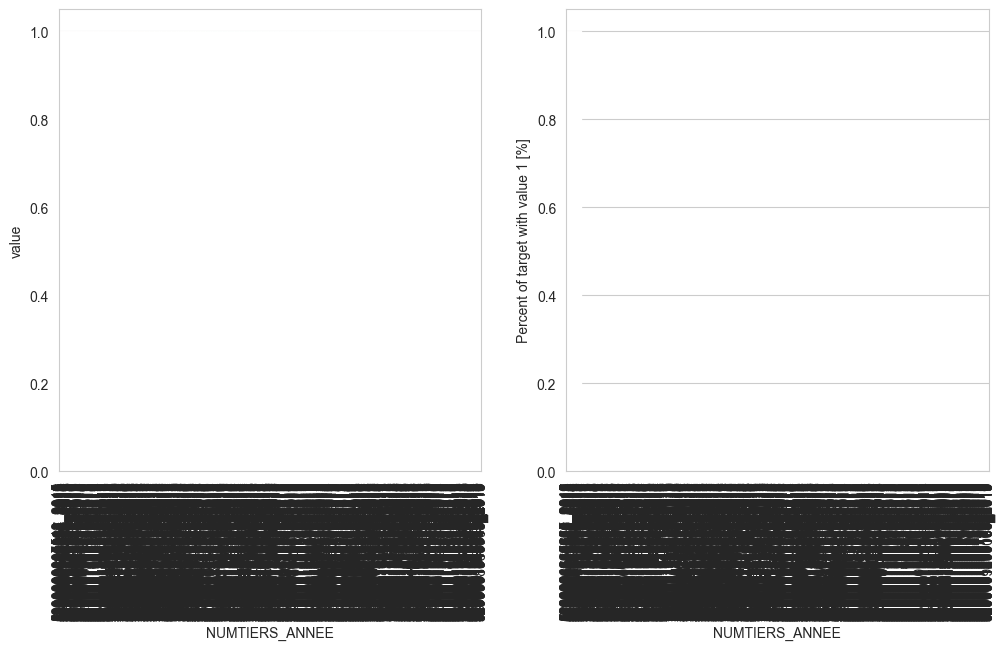

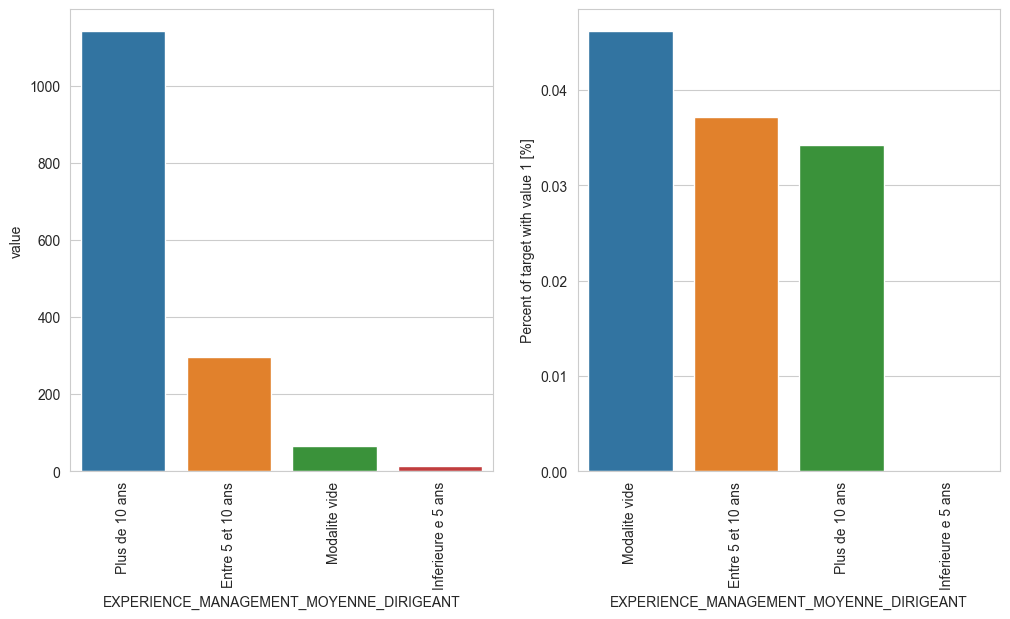

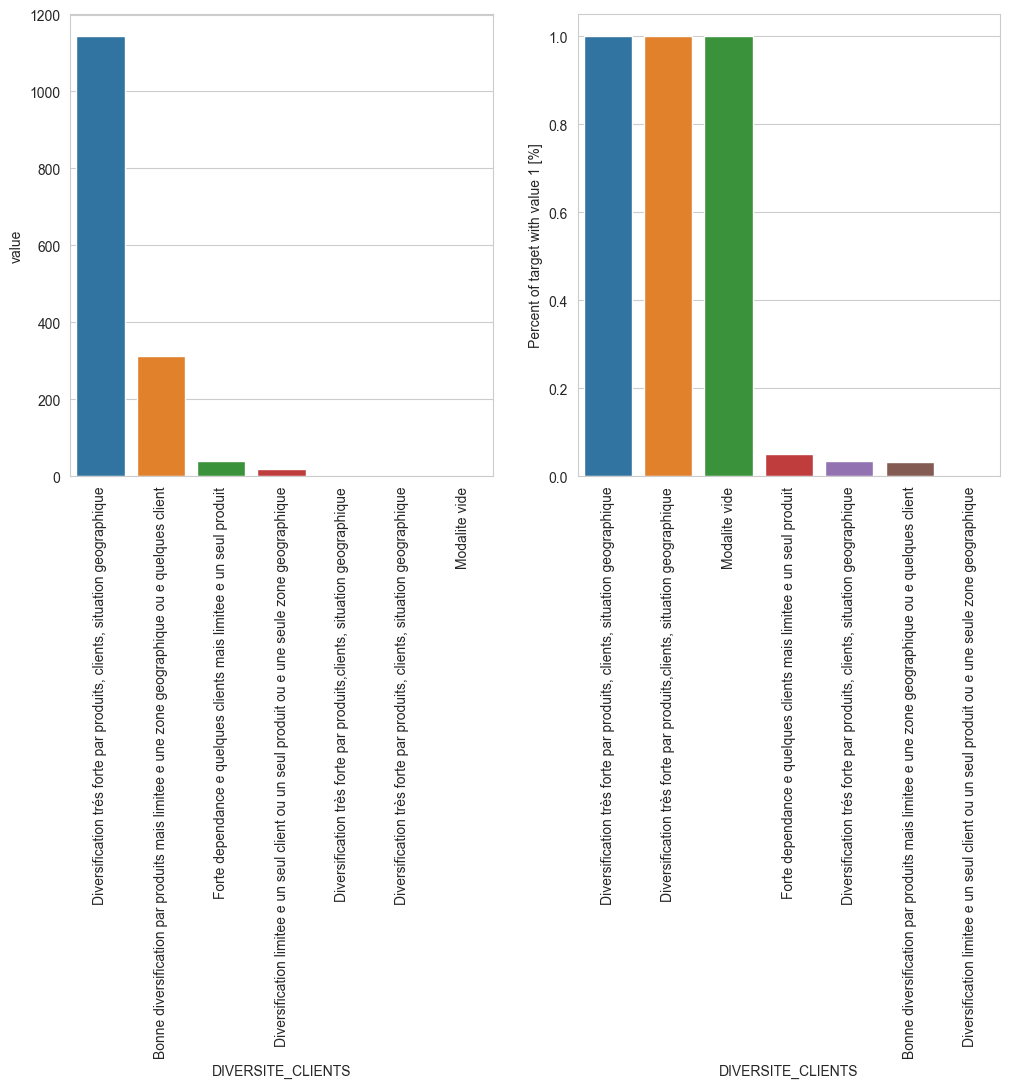

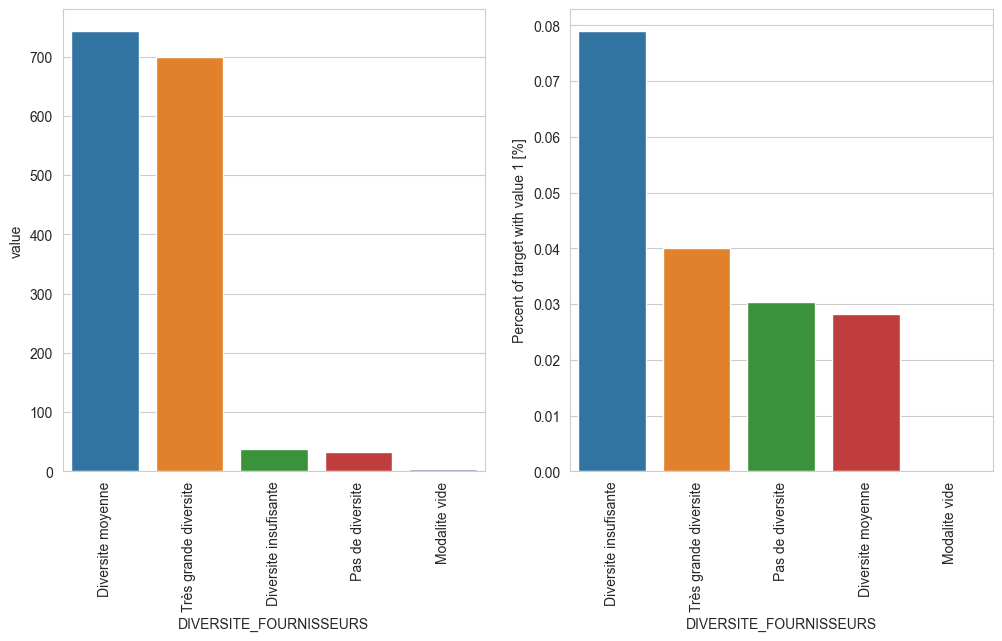

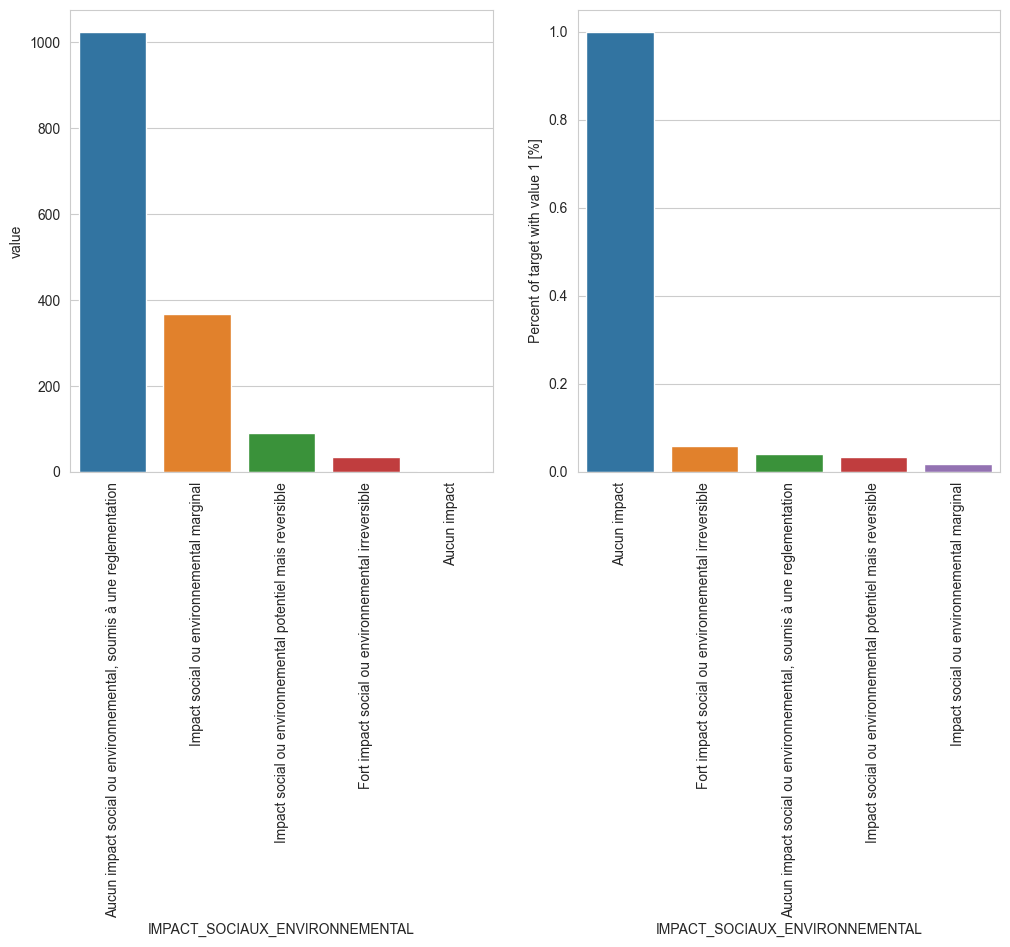

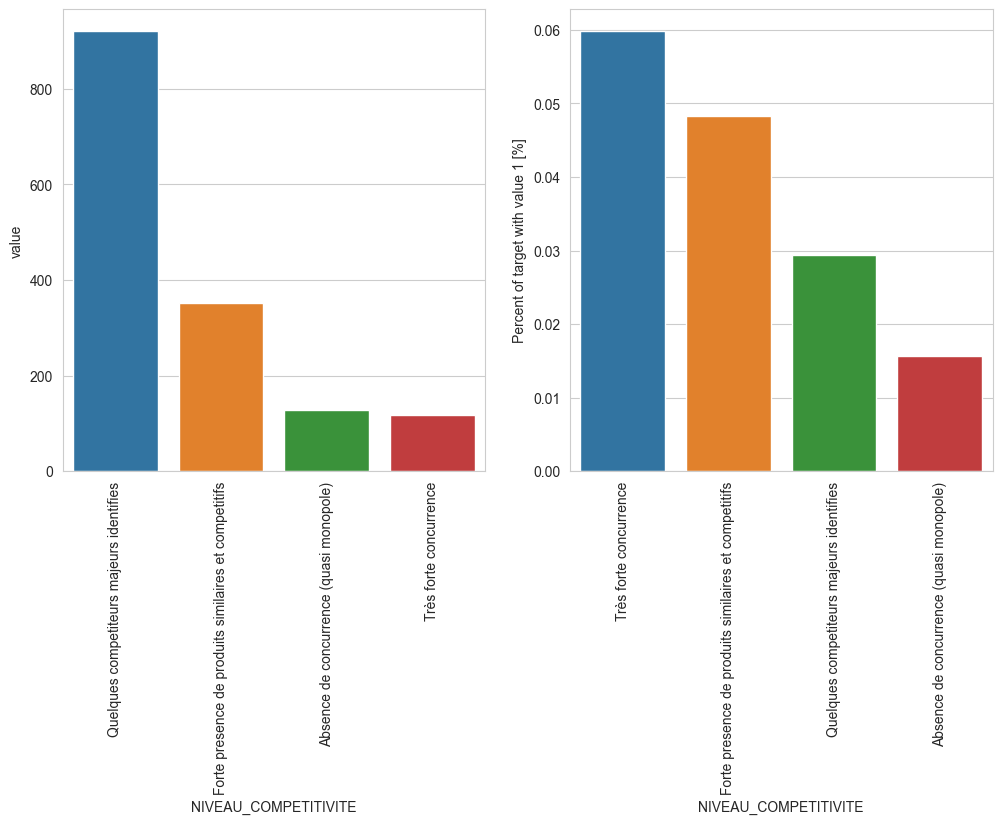

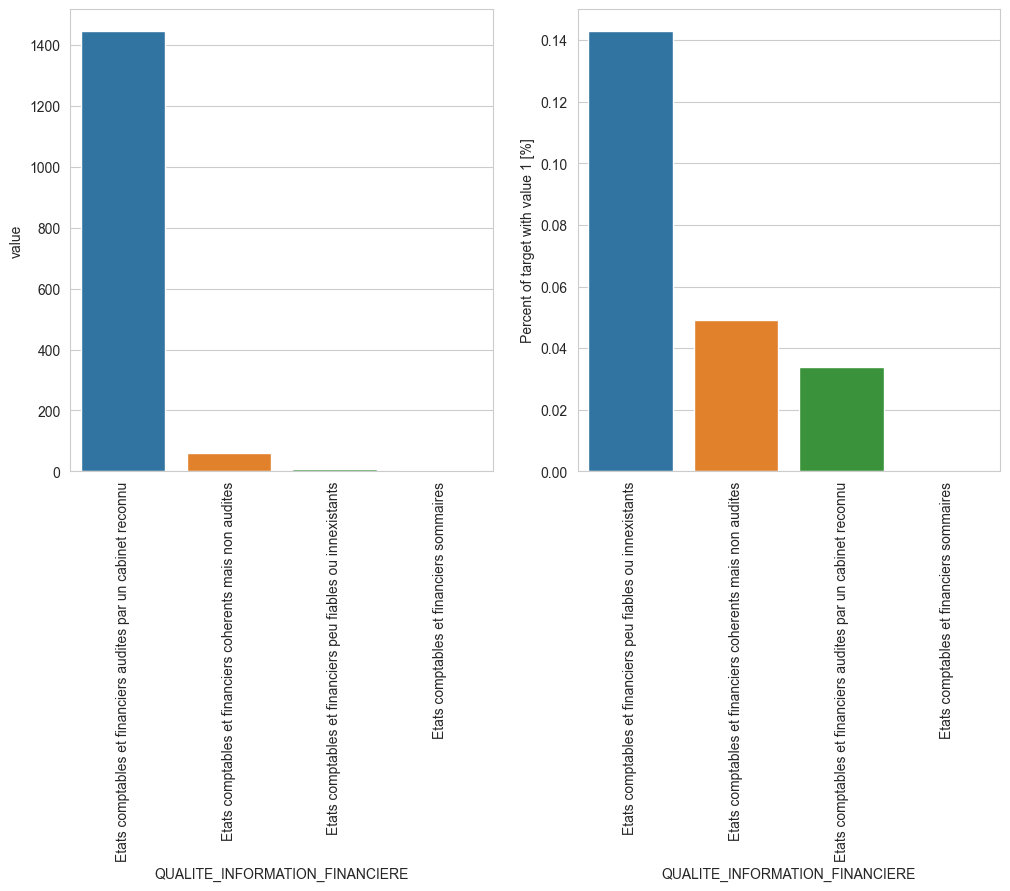

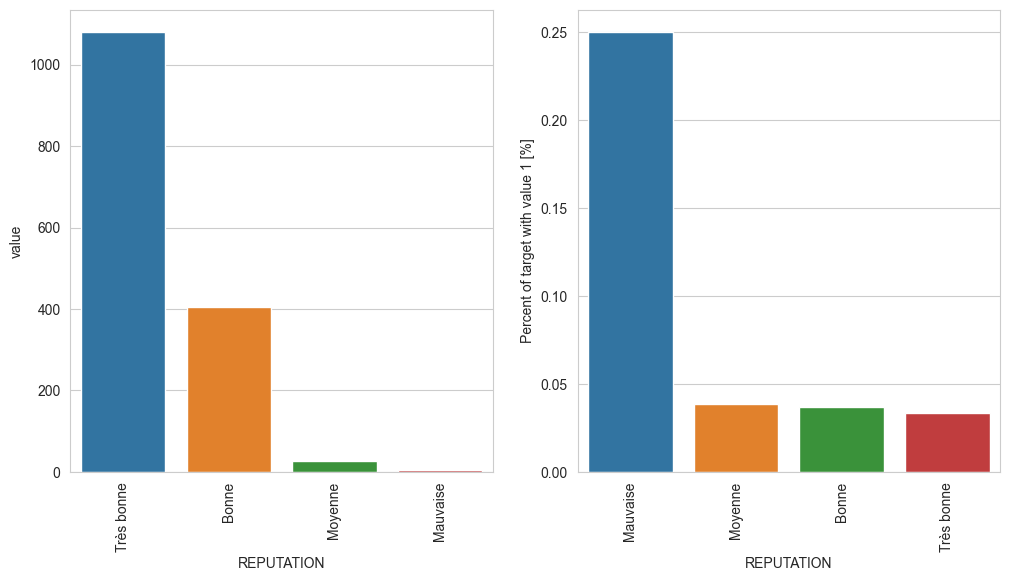

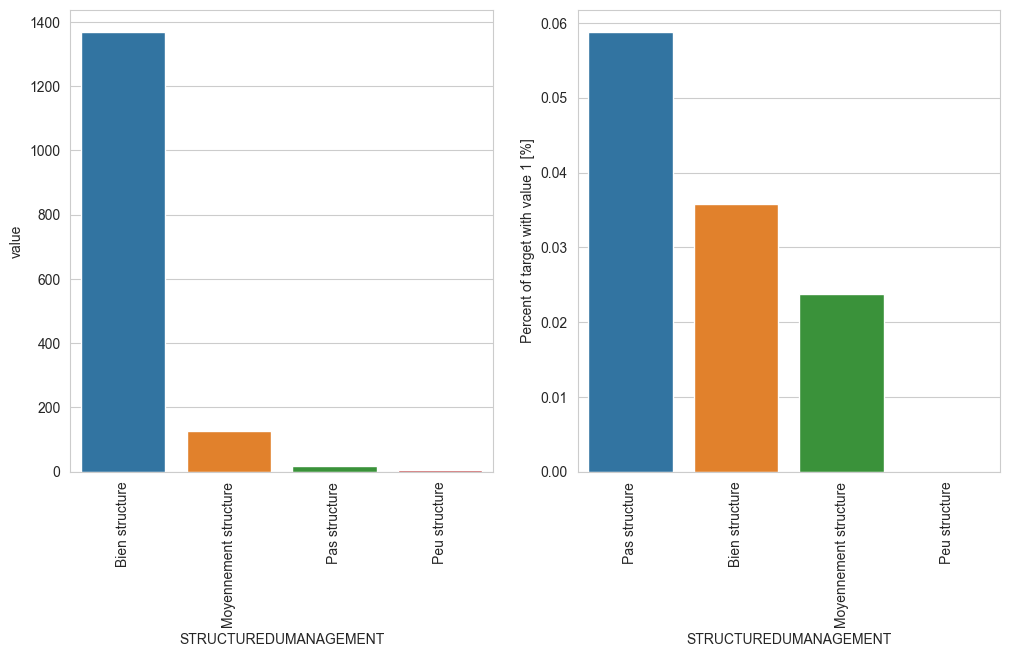

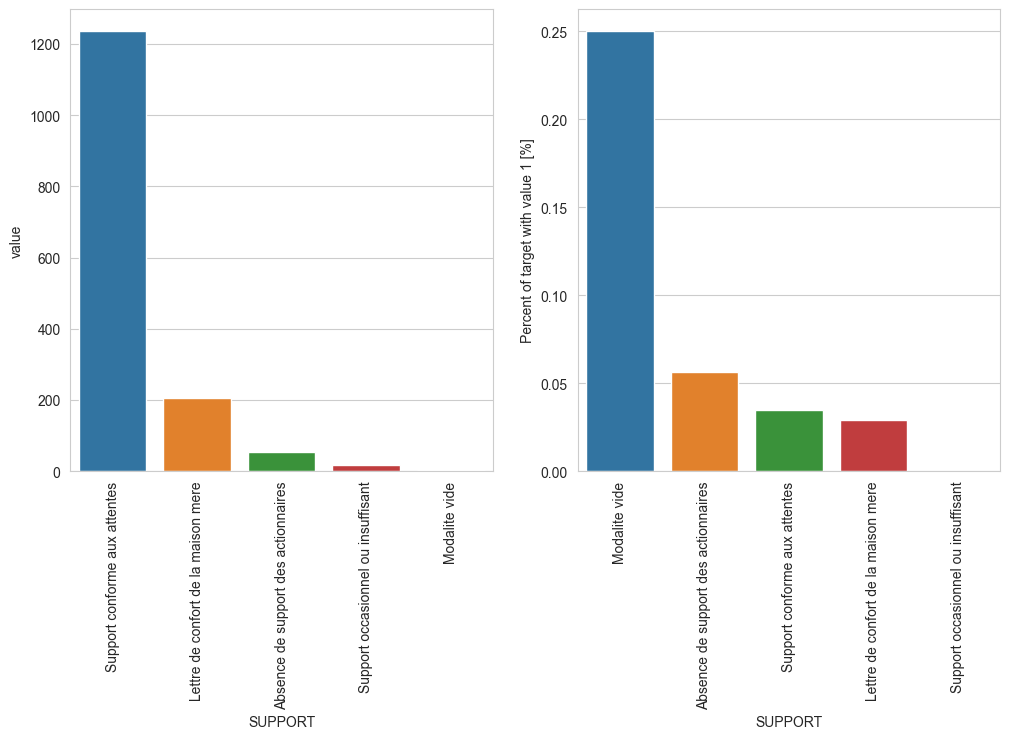

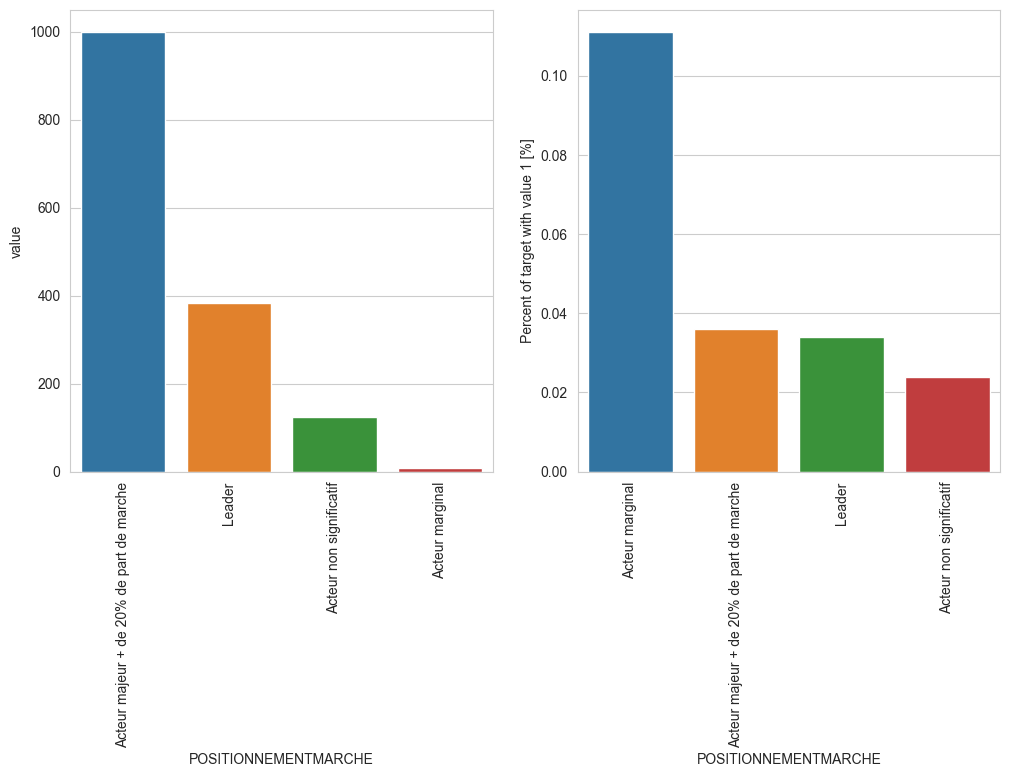

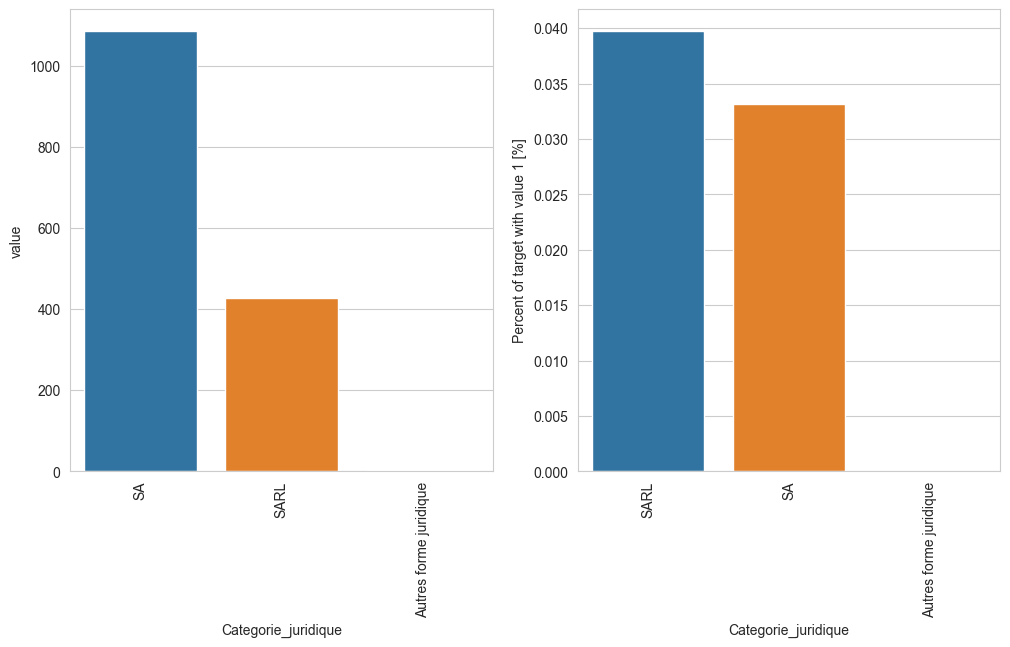

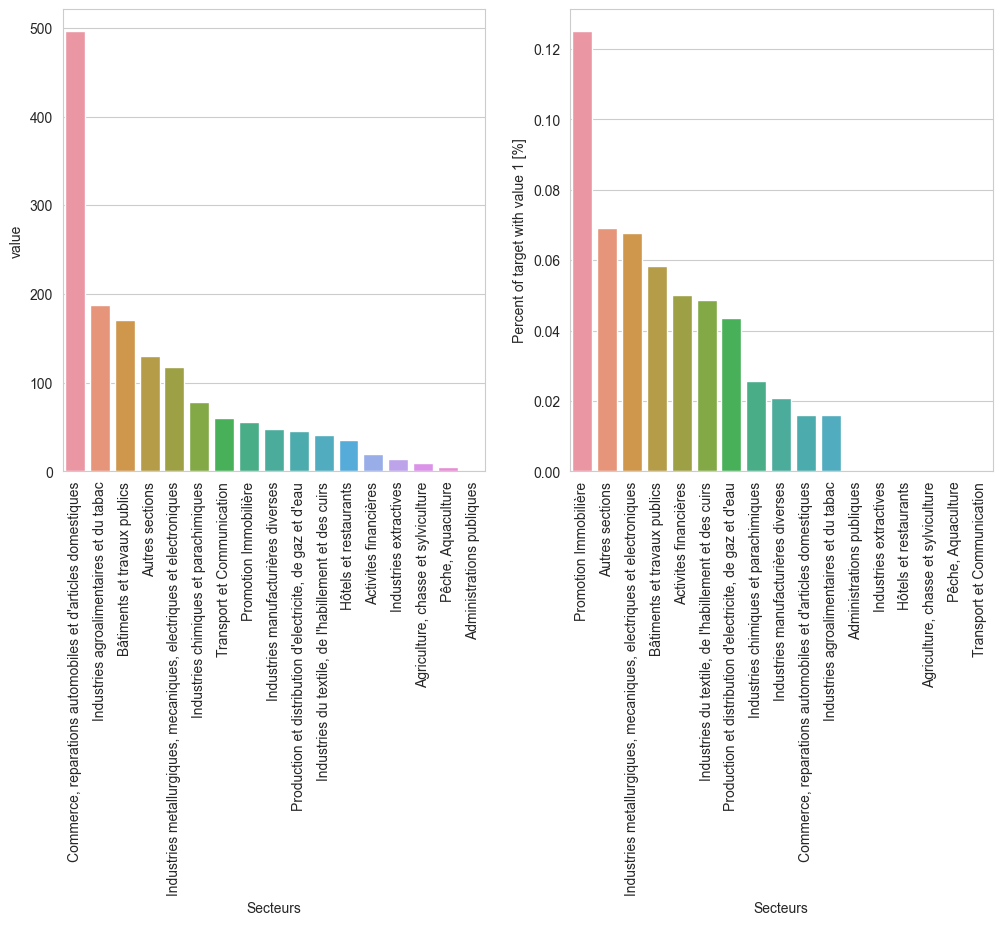

In [28]:
for feature in qualitative_columns:
    cat_stats(feature,df_nouveau)

Well this plots are very intersting! let's start by analysing features which have 'Modalite vide',if we focus in it's frequence with the traget(for features('SUPPORT','EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT'and'DIVERSITE_CLINETS') we find that they they are the most frequent class with the class '1' of the target,we can decide that 'Modalite vide' is imortant in the data so we can impute them instead of removing them.

In [29]:
df_nouveau.isin(["Modalite vide"]).sum()

numtiers                                    0
Annee                                       0
NUMTIERS_ANNEE                              0
defaut                                      0
DATE_DE_CREATION_TIERS                      0
DATE_DE_CREATION_ENTREP                     0
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT    65
DIVERSITE_CLIENTS                           1
DIVERSITE_FOURNISSEURS                      4
IMPACT_SOCIAUX_ENVIRONNEMENTAL              0
NIVEAU_COMPETITIVITE                        0
QUALITE_INFORMATION_FINANCIERE              0
REPUTATION                                  0
STRUCTUREDUMANAGEMENT                       0
SUPPORT                                     4
POSITIONNEMENTMARCHE                        0
Categorie_juridique                         0
Secteurs                                    0
Ratio de Liquidité Générale                 0
Rotation des Stocks                         0
Ratio dEndettement                          0
Marge Nette                       

In [30]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values='Modalite vide',strategy='most_frequent')
df_nouveau=pd.DataFrame(imputer.fit_transform(df_nouveau),columns=df_nouveau.columns)
df_nouveau[numeric_features]=df_nouveau[numeric_features].astype('float64')

In [31]:
df_nouveau.isin(["Modalite vide"]).sum()

numtiers                                   0
Annee                                      0
NUMTIERS_ANNEE                             0
defaut                                     0
DATE_DE_CREATION_TIERS                     0
DATE_DE_CREATION_ENTREP                    0
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT    0
DIVERSITE_CLIENTS                          0
DIVERSITE_FOURNISSEURS                     0
IMPACT_SOCIAUX_ENVIRONNEMENTAL             0
NIVEAU_COMPETITIVITE                       0
QUALITE_INFORMATION_FINANCIERE             0
REPUTATION                                 0
STRUCTUREDUMANAGEMENT                      0
SUPPORT                                    0
POSITIONNEMENTMARCHE                       0
Categorie_juridique                        0
Secteurs                                   0
Ratio de Liquidité Générale                0
Rotation des Stocks                        0
Ratio dEndettement                         0
Marge Nette                                0
Taille_ent

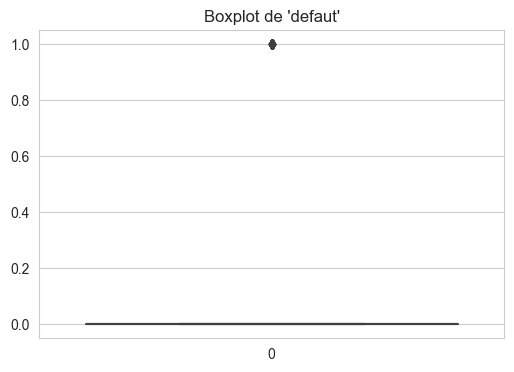

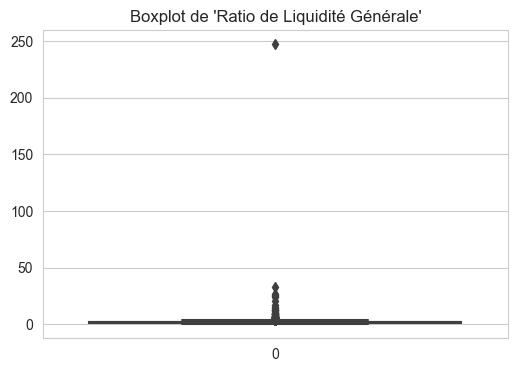

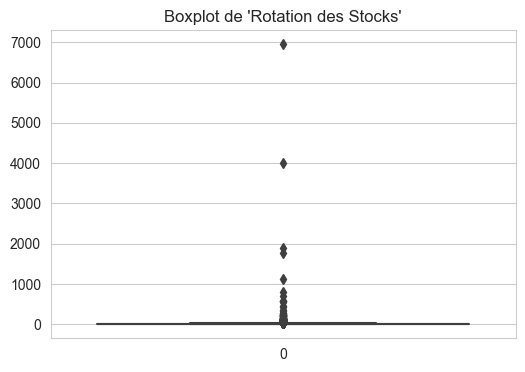

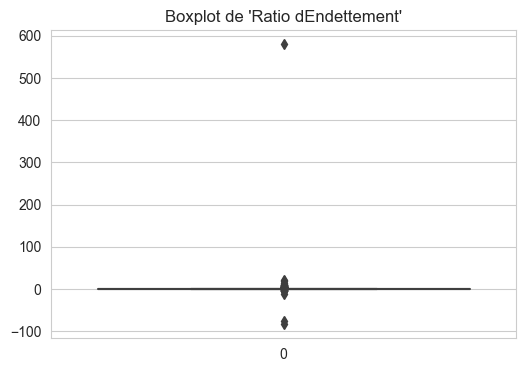

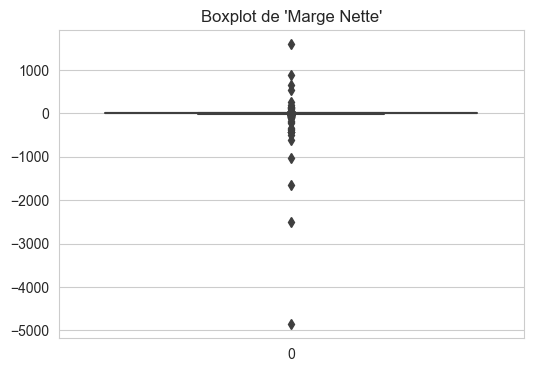

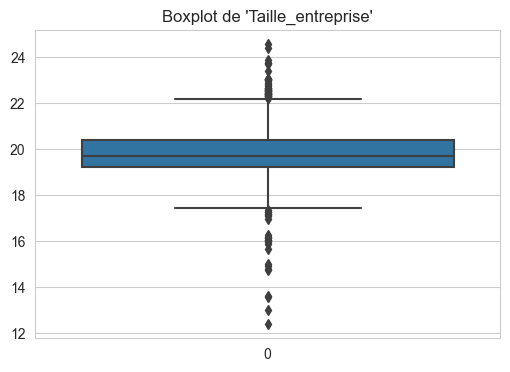

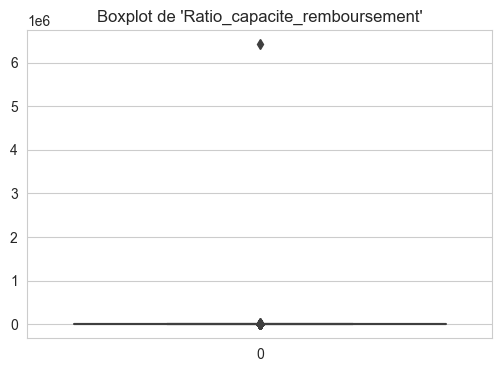

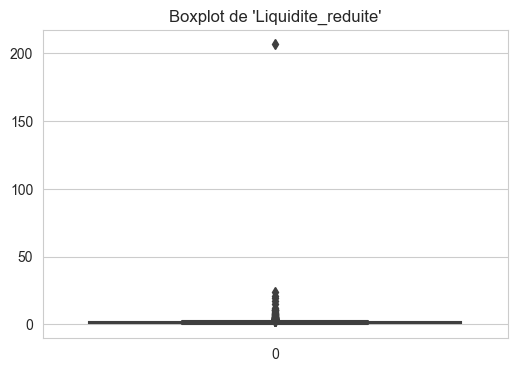

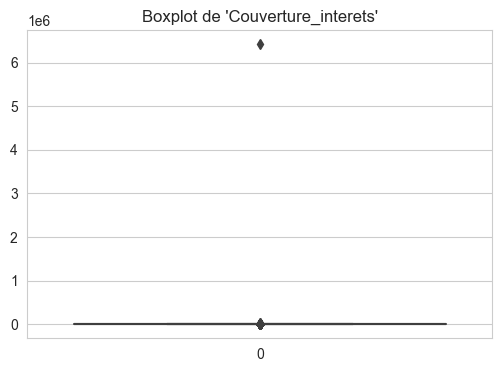

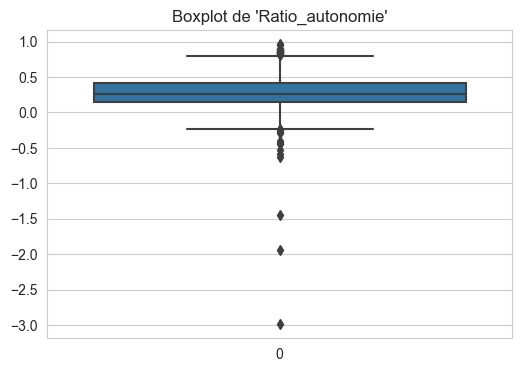

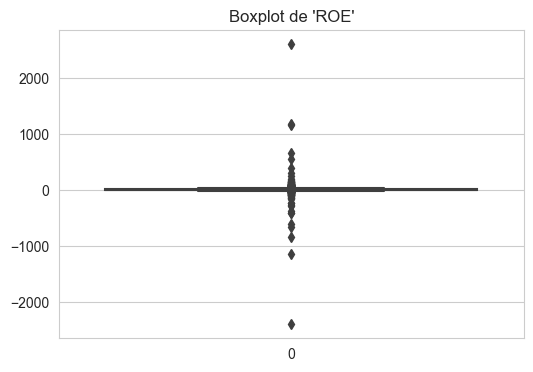

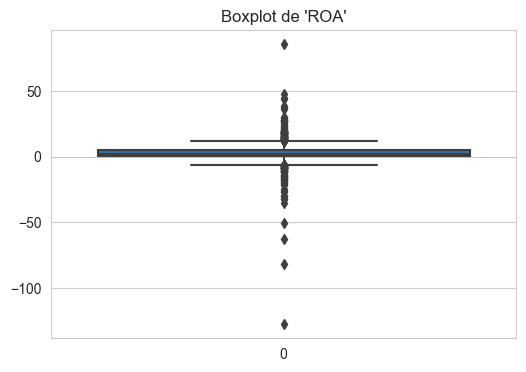

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display boxplots for each numeric variable
for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_nouveau[feature])
    plt.title(f"Boxplot de '{feature}'")
    plt.show()


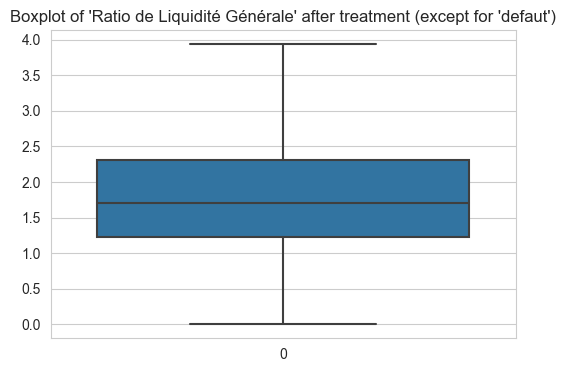

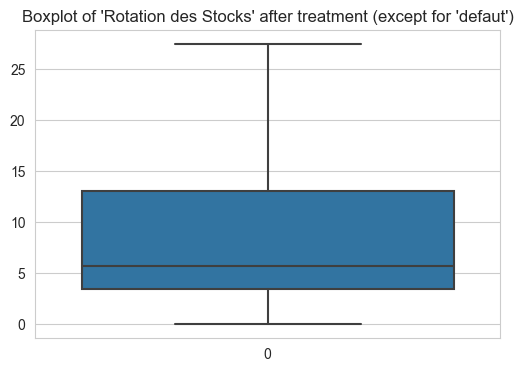

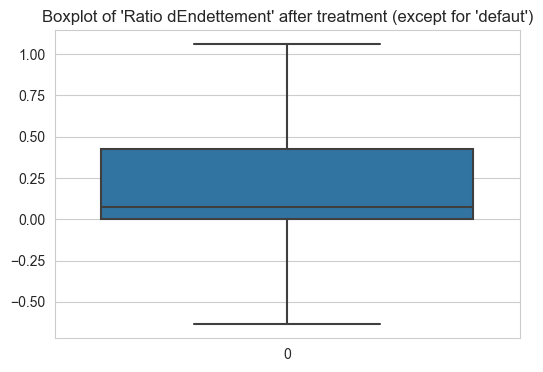

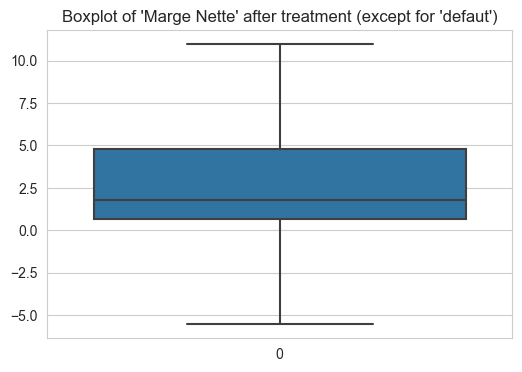

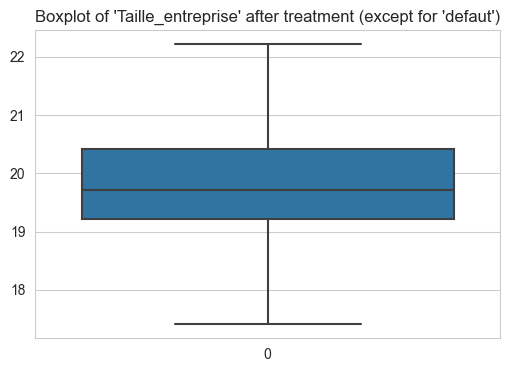

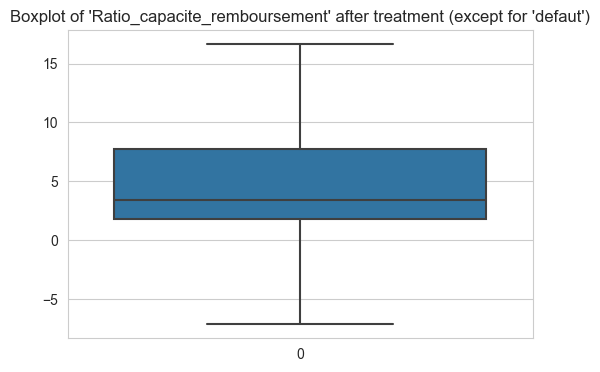

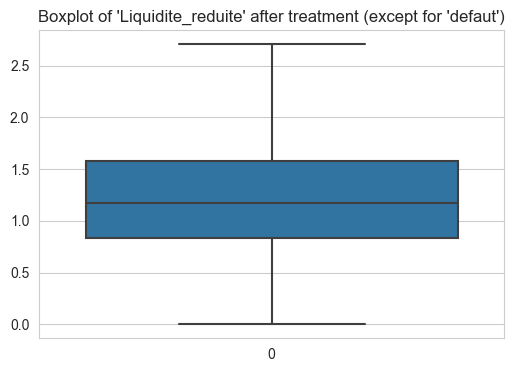

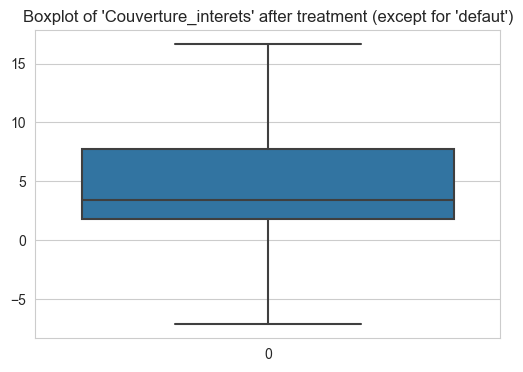

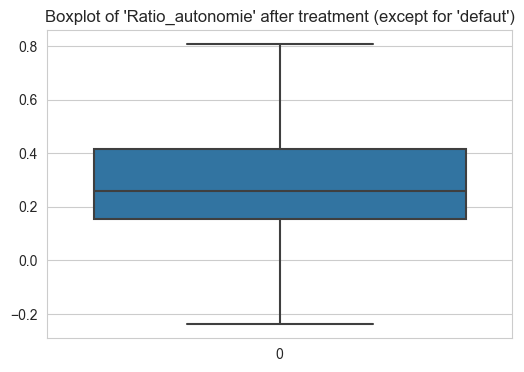

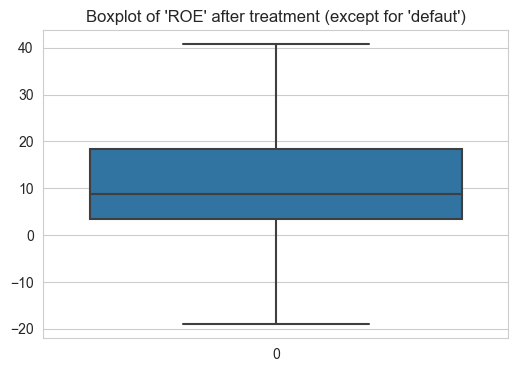

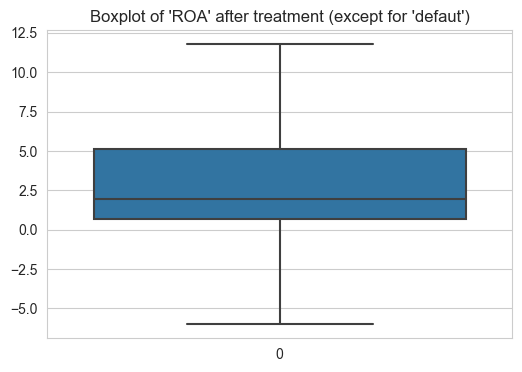

In [33]:
# Outlier detection and treatment for all numeric variables except 'defaut'
def treat_outliers_except_defaut(dataframe, features):
    for feature in features:
        if feature != 'defaut':  # Exclure la variable 'defaut'
            Q1 = dataframe[feature].quantile(0.25)
            Q3 = dataframe[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            dataframe[feature] = dataframe[feature].clip(lower=lower_bound, upper=upper_bound)
            
# Applying outlier treatment for all numeric variables except 'defaut'
treat_outliers_except_defaut(df_nouveau, numeric_features)

# Displaying boxplots after outlier treatment for all numeric variables except 'defaut'
for feature in numeric_features:
    if feature != 'defaut':  # Exclude the 'defaut' variable
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df_nouveau[feature])
        plt.title(f"Boxplot of '{feature}' after treatment (except for 'defaut')")
        plt.show()


Now after dealing with anomalis its important to turn categorical features to numeric type before start modeling,so we will apply LabelEncoding to the ordinal features and OneHotEncoding to the nominal features.

from the anova table we can decide wich categorical features have an impact on the target by selecting only the features whoes p_value is greater than the threshold (0.05).

In [34]:
# Calculating the percentage of NaN values in each column
nan_percentage = df_nouveau.isna().mean() * 100
print("Percentage of NaN values in each column:\n", nan_percentage)


Percentage of NaN values in each column:
 numtiers                                   0.0
Annee                                      0.0
NUMTIERS_ANNEE                             0.0
defaut                                     0.0
DATE_DE_CREATION_TIERS                     0.0
DATE_DE_CREATION_ENTREP                    0.0
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT    0.0
DIVERSITE_CLIENTS                          0.0
DIVERSITE_FOURNISSEURS                     0.0
IMPACT_SOCIAUX_ENVIRONNEMENTAL             0.0
NIVEAU_COMPETITIVITE                       0.0
QUALITE_INFORMATION_FINANCIERE             0.0
REPUTATION                                 0.0
STRUCTUREDUMANAGEMENT                      0.0
SUPPORT                                    0.0
POSITIONNEMENTMARCHE                       0.0
Categorie_juridique                        0.0
Secteurs                                   0.0
Ratio de Liquidité Générale                0.0
Rotation des Stocks                        0.0
Ratio dEndettement

In [35]:
# Define a function to detect infinite values
def is_infinite(value):
    if isinstance(value, float):
        return np.isinf(value)
    return False

# Apply the custom function to each element of the DataFrame
inf_percentage = df_nouveau.applymap(is_infinite).mean() * 100

# Display the percentage of infinite values in each column
print("Percentage of infinite values in each column:\n", inf_percentage)


Percentage of infinite values in each column:
 numtiers                                   0.0
Annee                                      0.0
NUMTIERS_ANNEE                             0.0
defaut                                     0.0
DATE_DE_CREATION_TIERS                     0.0
DATE_DE_CREATION_ENTREP                    0.0
EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT    0.0
DIVERSITE_CLIENTS                          0.0
DIVERSITE_FOURNISSEURS                     0.0
IMPACT_SOCIAUX_ENVIRONNEMENTAL             0.0
NIVEAU_COMPETITIVITE                       0.0
QUALITE_INFORMATION_FINANCIERE             0.0
REPUTATION                                 0.0
STRUCTUREDUMANAGEMENT                      0.0
SUPPORT                                    0.0
POSITIONNEMENTMARCHE                       0.0
Categorie_juridique                        0.0
Secteurs                                   0.0
Ratio de Liquidité Générale                0.0
Rotation des Stocks                        0.0
Ratio dEndett

In [36]:
df_nouveau.columns

Index(['numtiers', 'Annee', 'NUMTIERS_ANNEE', 'defaut',
       'DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP',
       'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS',
       'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE',
       'Categorie_juridique', 'Secteurs', 'Ratio de Liquidité Générale',
       'Rotation des Stocks', 'Ratio dEndettement', 'Marge Nette',
       'Taille_entreprise', 'Ratio_capacite_remboursement',
       'Liquidite_reduite', 'Couverture_interets', 'Ratio_autonomie', 'ROE',
       'ROA'],
      dtype='object')

In [37]:
df_num=df_nouveau[numeric_features]

In [38]:
import pandas as pd
import scipy.stats as stats

class CategoricalFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature

    @property
    def df_lite(self):
        df_lite = self.df
        df_lite['bin'] = df_lite[self.feature].fillna('MISSING')
        return df_lite[['bin', 'defaut']]


class ContinuousFeature():
    def __init__(self, df, feature):
        self.df = df
        self.feature = feature
        self.bin_min_size = int(len(self.df) * 0.05)

    def __generate_bins(self, bins_num):
        df = self.df[[self.feature, 'defaut']]
        df['bin'] = pd.qcut(df[self.feature], bins_num, duplicates='drop') \
                    .apply(lambda x: x.left) \
                    .astype(float)
        return df

    def __generate_correct_bins(self, bins_max=20):
        for bins_num in range(bins_max, 1, -1):
            df = self.__generate_bins(bins_num)
            df_grouped = pd.DataFrame(df.groupby('bin') \
                                      .agg({self.feature: 'count',
                                            'defaut': 'sum'})) \
                                      .reset_index()
            r, p = stats.stats.spearmanr(df_grouped['bin'], df_grouped['defaut'])

            if (
                    abs(r)==1 and                                                      
                    df_grouped[self.feature].min() > self.bin_min_size                   
                    and not (df_grouped[self.feature] == df_grouped['defaut']).any()      
            ):
                break

        return df

    @property
    def df_lite(self):
        df_lite = self.__generate_correct_bins()
        df_lite['bin'].fillna('MISSING', inplace=True)
        return df_lite[['bin', 'defaut']]

In [39]:
class Analysis():
    def seq_palette(self, n_colors):
        return sns.cubehelix_palette(n_colors, start=.5, rot=-.75, reverse=True)

    def group_by_feature(self, feat):
        df = feat.df_lite \
                            .groupby('bin') \
                            .agg({'defaut': ['count', 'sum']}) \
                            .reset_index()
        df.columns = [feat.feature, 'count', 'good']
        df['bad'] = df['count'] - df['good']
        return df

In [40]:
class IV(Analysis):
    @staticmethod
    def __perc_share(df, group_name):
        return df[group_name] / df[group_name].sum()

    def __calculate_perc_share(self, feat):
        df = self.group_by_feature(feat)
        df['perc_good'] = self.__perc_share(df, 'good')
        df['perc_bad'] = self.__perc_share(df, 'bad')
        df['perc_diff'] = df['perc_good'] - df['perc_bad']
        return df

    def __calculate_woe(self, feat):
        df = self.__calculate_perc_share(feat)
        df['woe'] = np.log(df['perc_good']/df['perc_bad'])
        df['woe'] = df['woe'].replace([np.inf, -np.inf], np.nan).fillna(0)
        return df

    def calculate_iv(self, feat):
        df = self.__calculate_woe(feat)
        df['iv'] = df['perc_diff'] * df['woe']
        return df, df['iv'].sum()

    def draw_woe(self, feat):
        iv_df, iv_value = self.calculate_iv(feat)
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=feat.feature, y='woe', data=iv_df, palette=self.seq_palette(len(iv_df.index)))
        ax.set_title('WOE visualization for: ' + feat.feature)
        plt.show()
        plt.show()

    @staticmethod
    def interpretation(iv):
        if iv < 0.02:
            return 'useless'
        elif iv < 0.1:
            return 'weak'
        elif iv < 0.3:
            return 'medium'
        elif iv < 0.5:
            return 'strong'
        else:
            return 'suspicious'

    def interpret_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        return self.interpretation(iv)

    def print_iv(self, feat):
        _, iv = self.calculate_iv(feat)
        print('Information value: %0.2f' % iv)
        print('%s is a %s predictor' % (feat.feature.capitalize(), self.interpretation(iv)))

In [41]:
iv = IV()


In [42]:
categories_features

['NUMTIERS_ANNEE',
 'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT',
 'DIVERSITE_CLIENTS',
 'DIVERSITE_FOURNISSEURS',
 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
 'NIVEAU_COMPETITIVITE',
 'QUALITE_INFORMATION_FINANCIERE',
 'REPUTATION',
 'STRUCTUREDUMANAGEMENT',
 'SUPPORT',
 'POSITIONNEMENTMARCHE',
 'Categorie_juridique',
 'Secteurs']

In [43]:
numeric_features

['defaut',
 'Ratio de Liquidité Générale',
 'Rotation des Stocks',
 'Ratio dEndettement',
 'Marge Nette',
 'Taille_entreprise',
 'Ratio_capacite_remboursement',
 'Liquidite_reduite',
 'Couverture_interets',
 'Ratio_autonomie',
 'ROE',
 'ROA']

,Ratio de Liquidité Générale,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-0.001,506,11.0,495.0,0.207547,0.338115,-0.130568,-0.488027,0.06372
1,1.394,505,20.0,485.0,0.377358,0.331284,0.046074,0.130219,0.00600
2,2.076,506,22.0,484.0,0.415094,0.330601,0.084493,0.227593,0.01923


Information value:  0.0889503293187443


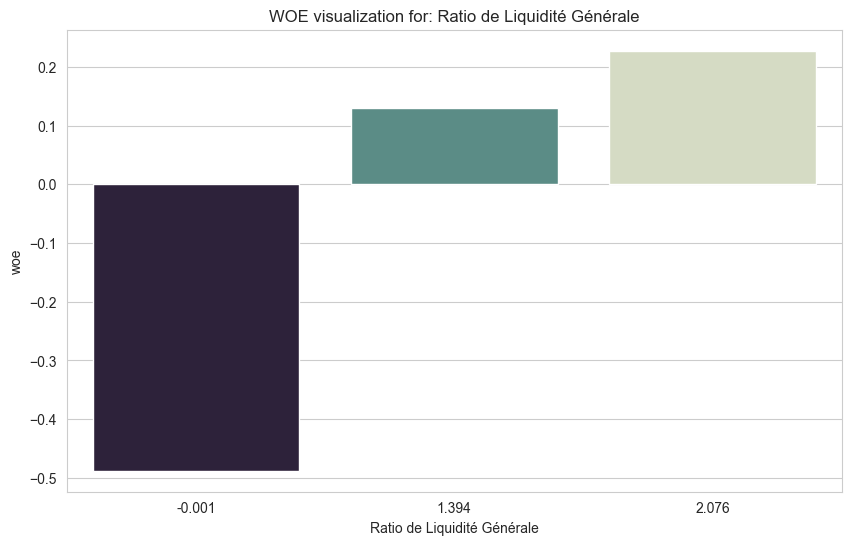

Ratio de liquidité générale is a weak predictor.
Information value: 0.09
Ratio de liquidité générale is a weak predictor


,Rotation des Stocks,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,0.00067,506,23.0,483.0,0.433962,0.329918,0.104044,0.274113,0.028520
1,4.18400,505,16.0,489.0,0.301887,0.334016,-0.032130,-0.101138,0.003250
2,9.10000,506,14.0,492.0,0.264151,0.336066,-0.071915,-0.240786,0.017316


Information value:  0.049085443096579855


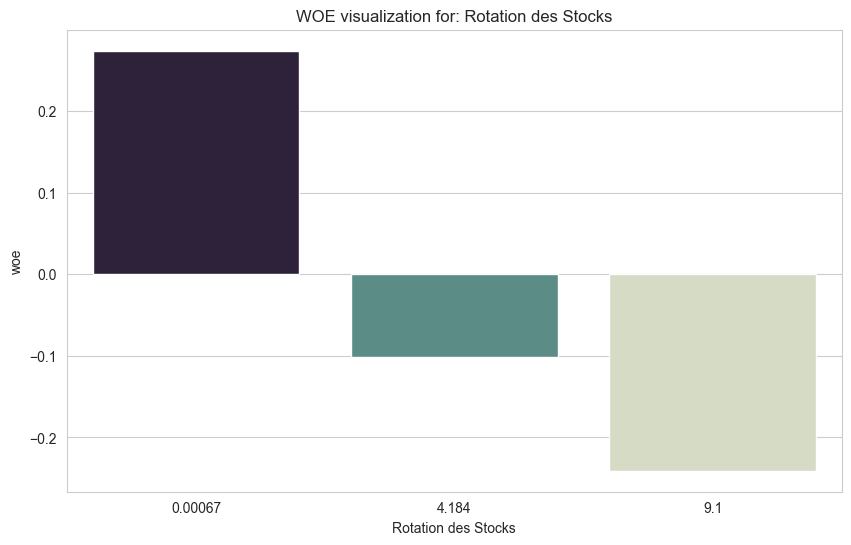

Rotation des stocks is a weak predictor.
Information value: 0.05
Rotation des stocks is a weak predictor


,Ratio dEndettement,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-0.637,584,15.0,569.0,0.283019,0.388661,-0.105642,-0.317194,0.033509
1,0.000,427,16.0,411.0,0.301887,0.280738,0.021149,0.072631,0.001536
2,0.252,506,22.0,484.0,0.415094,0.330601,0.084493,0.227593,0.019230


Information value:  0.054275346995679485


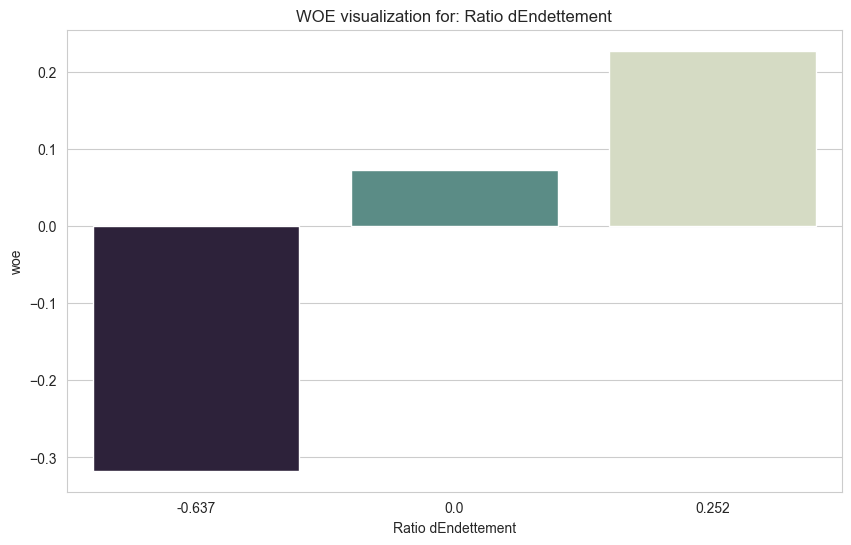

Ratio dendettement is a weak predictor.
Information value: 0.05
Ratio dendettement is a weak predictor


,Marge Nette,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-5.537,506,27.0,479.0,0.509434,0.327186,0.182248,0.442772,0.080694
1,0.997,505,19.0,486.0,0.358491,0.331967,0.026523,0.076866,0.002039
2,3.283,506,7.0,499.0,0.132075,0.340847,-0.208772,-0.948060,0.197928


Information value:  0.28066110792154625


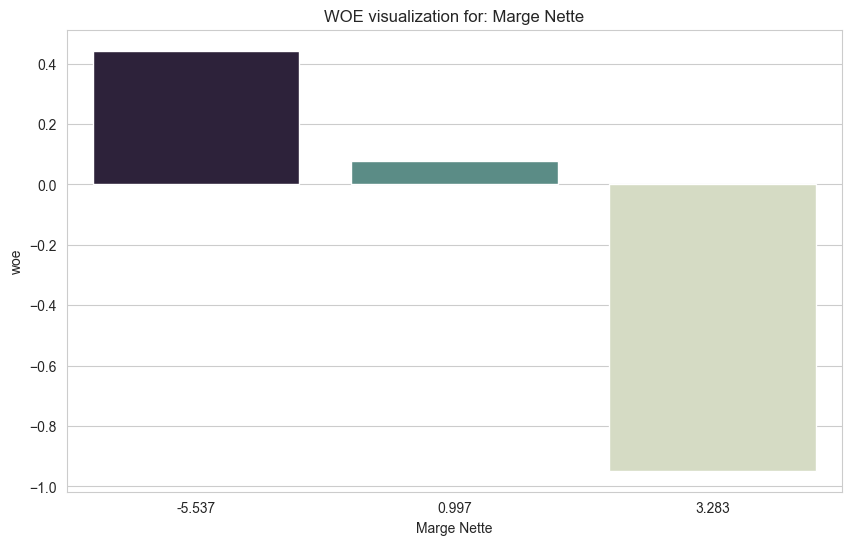

Marge nette is a medium predictor.
Information value: 0.28
Marge nette is a medium predictor


,Taille_entreprise,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,17.407,759,27.0,732.0,0.509434,0.5,0.009434,0.018692,0.000176
1,19.720,758,26.0,732.0,0.490566,0.5,-0.009434,-0.019048,0.000180


Information value:  0.0003560408300268586


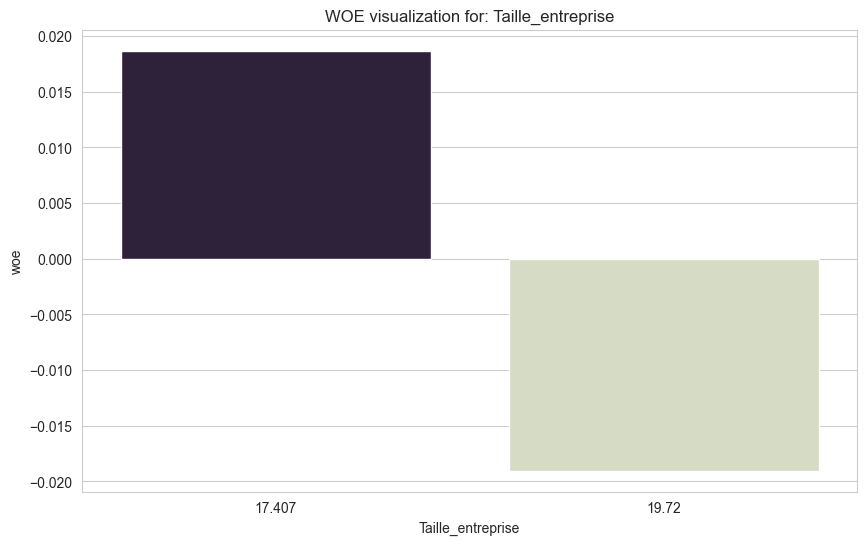

Taille_entreprise is a useless predictor.
Information value: 0.00
Taille_entreprise is a useless predictor


,Ratio_capacite_remboursement,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-7.143,380,24.0,356.0,0.452830,0.243169,0.209661,0.621759,0.130358
1,1.774,379,14.0,365.0,0.264151,0.249317,0.014834,0.057796,0.000857
2,3.391,379,11.0,368.0,0.207547,0.251366,-0.043819,-0.191552,0.008394
3,7.717,379,4.0,375.0,0.075472,0.256148,-0.180676,-1.221996,0.220785


Information value:  0.3603945392155456


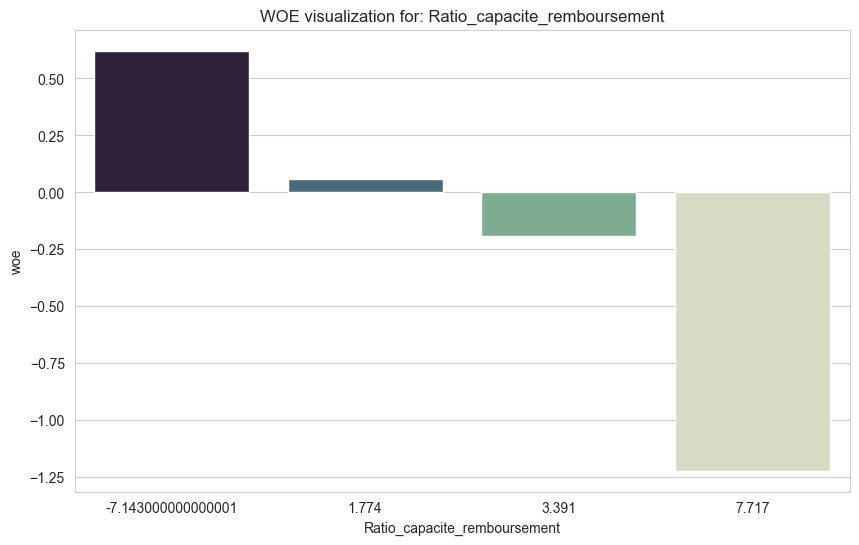

Ratio_capacite_remboursement is a strong predictor.
Information value: 0.36
Ratio_capacite_remboursement is a strong predictor


,Liquidite_reduite,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-0.001,759,19.0,740.0,0.358491,0.505464,-0.146974,-0.343575,0.050497
1,1.168,758,34.0,724.0,0.641509,0.494536,0.146974,0.260205,0.038243


Information value:  0.08873996016272759


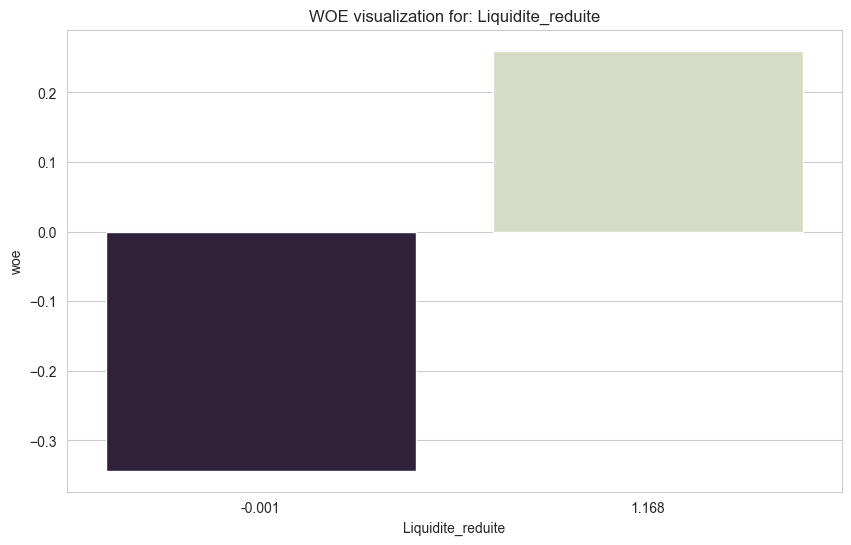

Liquidite_reduite is a weak predictor.
Information value: 0.09
Liquidite_reduite is a weak predictor


,Couverture_interets,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-7.143,380,24.0,356.0,0.452830,0.243169,0.209661,0.621759,0.130358
1,1.774,379,14.0,365.0,0.264151,0.249317,0.014834,0.057796,0.000857
2,3.391,379,11.0,368.0,0.207547,0.251366,-0.043819,-0.191552,0.008394
3,7.717,379,4.0,375.0,0.075472,0.256148,-0.180676,-1.221996,0.220785


Information value:  0.3603945392155456


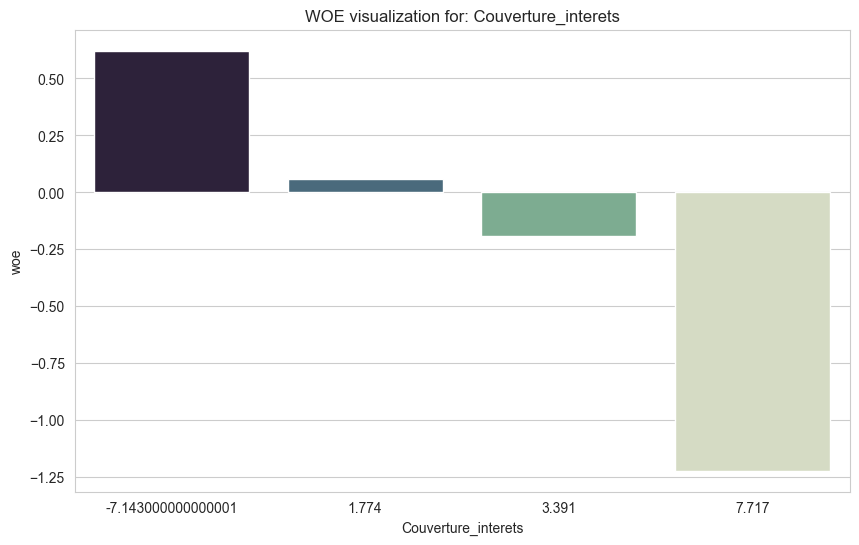

Couverture_interets is a strong predictor.
Information value: 0.36
Couverture_interets is a strong predictor


,Ratio_autonomie,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-0.239,506,25.0,481.0,0.471698,0.328552,0.143146,0.361644,0.051768
1,0.180,505,16.0,489.0,0.301887,0.334016,-0.032130,-0.101138,0.003250
2,0.361,506,12.0,494.0,0.226415,0.337432,-0.111017,-0.398993,0.044295


Information value:  0.09931239152549783


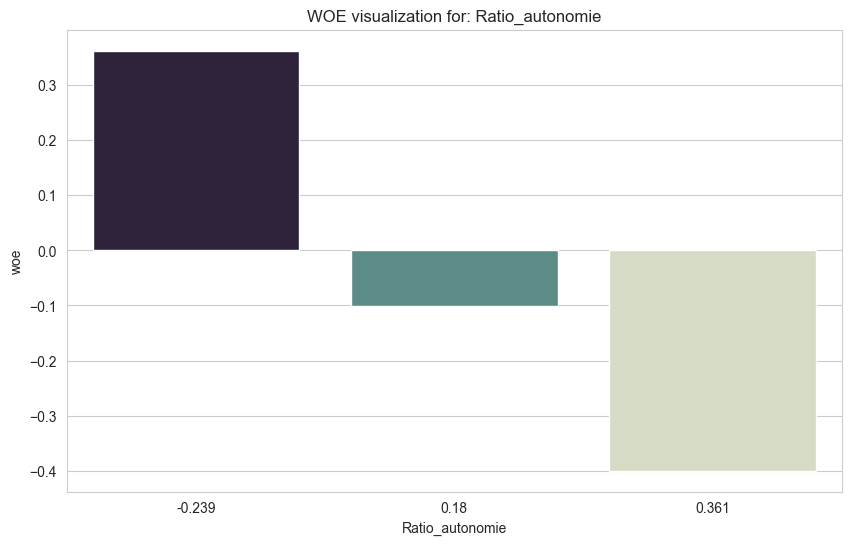

Ratio_autonomie is a weak predictor.
Information value: 0.10
Ratio_autonomie is a weak predictor


,ROE,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-19.058,380,23.0,357.0,0.433962,0.243852,0.190110,0.576394,0.109578
1,3.370,379,16.0,363.0,0.301887,0.247951,0.053936,0.196822,0.010616
2,8.836,379,9.0,370.0,0.169811,0.252732,-0.082921,-0.397643,0.032973
3,18.320,379,5.0,374.0,0.094340,0.255464,-0.161125,-0.996182,0.160510


Information value:  0.3136765544003926


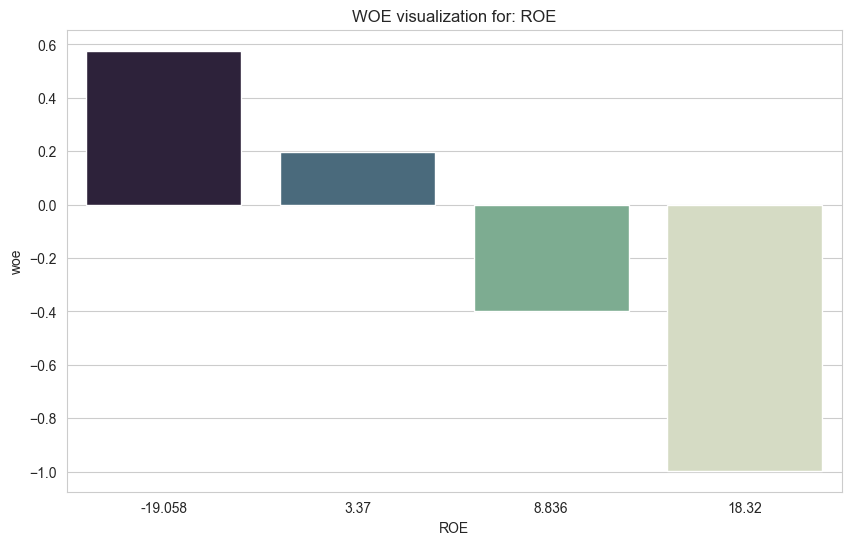

Roe is a strong predictor.
Information value: 0.31
Roe is a strong predictor


,ROA,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,-6.004,253,15.0,238.0,0.283019,0.162568,0.120451,0.554415,0.066780
1,0.127,253,14.0,239.0,0.264151,0.163251,0.100900,0.481230,0.048556
2,1.052,253,9.0,244.0,0.169811,0.166667,0.003145,0.018692,0.000059
3,1.960,252,7.0,245.0,0.132075,0.167350,-0.035274,-0.236712,0.008350
4,3.451,253,5.0,248.0,0.094340,0.169399,-0.075059,-0.585355,0.043936
5,7.149,253,3.0,250.0,0.056604,0.170765,-0.114161,-1.104213,0.126058


Information value:  0.2937387786898012


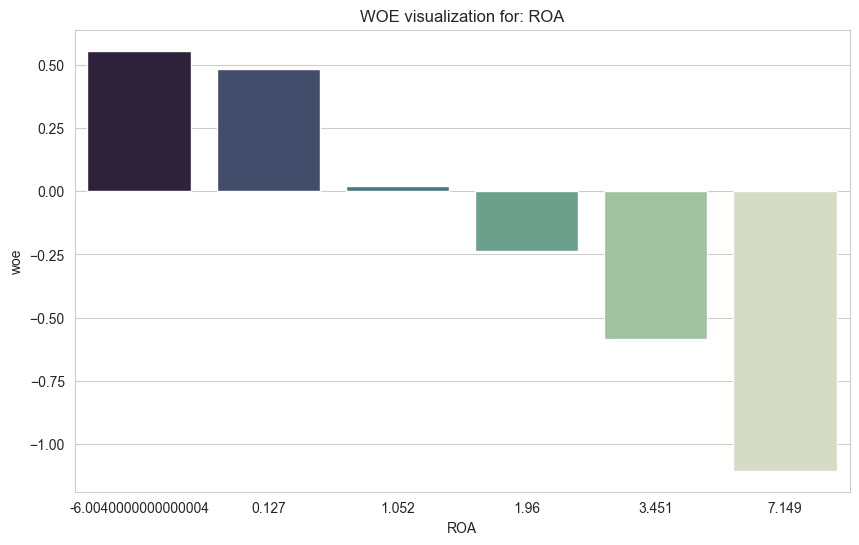

Roa is a medium predictor.
Information value: 0.29
Roa is a medium predictor


In [44]:
good_ratio=[]
for i in df_num.columns[1:]:
    feat_charges = ContinuousFeature(df_num, i)
    iv.group_by_feature(feat_charges)
    iv_df, iv_value = iv.calculate_iv(feat_charges)
    display(iv_df)
    print('Information value: ', iv_value)
    iv.draw_woe(feat_charges)
    if iv.interpret_iv(feat_charges) not in  ['useless','suspicious','weak'] : good_ratio+= [feat_charges.feature.capitalize()]
    print('%s is a %s predictor.' % (feat_charges.feature.capitalize(), iv.interpret_iv(feat_charges)))
    iv.print_iv(feat_charges)

In [45]:
good_ratio

['Marge nette',
 'Ratio_capacite_remboursement',
 'Couverture_interets',
 'Roe',
 'Roa']

In [46]:
categories_features=categories_features[1:]

In [47]:
categorical_vars=['defaut']+categories_features

In [48]:
categorical_vars_iv = {}
iv_calculator = IV()  # Create an instance of the IV class

for var_name in categorical_vars[1:]:
    # Assuming you have a DataFrame named df containing your data
    feat_data = df[var_name]    
    
    # Assuming your data has 'good' and 'bad' columns representing outcomes
    if isinstance(feat_data, pd.Series):  # Check if feat_data is a pandas Series
        feat = CategoricalFeature(df, var_name)  # Create a CategoricalFeature object
    else:
        raise ValueError("The feature data is not a pandas Series.")
    
    # Calculate IV for the variable using the IV instance
    iv_df, iv_value = iv_calculator.calculate_iv(feat)
    
    # Store IV DataFrame and total IV value for the variable
    categorical_vars_iv[var_name] = {'iv_df': iv_df, 'total_iv': iv_value}

# Print or analyze categorical_vars_iv dictionary as needed
for var_name, iv_data in categorical_vars_iv.items():
    print(f"Variable: {var_name}")
    print("IV DataFrame:")
    print(iv_data['iv_df'])
    print("Total IV:", iv_data['total_iv'])


Variable: EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT
IV DataFrame:
  EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT  count  good   bad  perc_good  \
0                       Entre 5 et 10 ans    296    11   285   0.207547   
1                      Inferieure e 5 ans     15     0    15   0.000000   
2                           Modalite vide     65     3    62   0.056604   
3                          Plus de 10 ans   1145    39  1106   0.735849   

   perc_bad  perc_diff       woe        iv  
0  0.194142   0.013405  0.066770  0.000895  
1  0.010218  -0.010218  0.000000 -0.000000  
2  0.042234   0.014369  0.292842  0.004208  
3  0.753406  -0.017557 -0.023579  0.000414  
Total IV: 0.0055170471426930455
Variable: DIVERSITE_CLIENTS
IV DataFrame:
                                   DIVERSITE_CLIENTS  count  good   bad  \
0  Bonne diversification par produits mais limite...    313    10   303   
1  Diversification limitee e un seul client ou un...     19     0    19   
2  Diversification tres forte par pr

In [49]:
categorical_vars=categorical_vars[1:]

In [50]:
categorical_vars

['EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT',
 'DIVERSITE_CLIENTS',
 'DIVERSITE_FOURNISSEURS',
 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
 'NIVEAU_COMPETITIVITE',
 'QUALITE_INFORMATION_FINANCIERE',
 'REPUTATION',
 'STRUCTUREDUMANAGEMENT',
 'SUPPORT',
 'POSITIONNEMENTMARCHE',
 'Categorie_juridique',
 'Secteurs']

,EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Entre 5 et 10 ans,296,11.0,285.0,0.207547,0.194672,0.012875,0.064042,0.000825
1,Inferieure e 5 ans,15,0.0,15.0,0.000000,0.010246,-0.010246,0.000000,-0.000000
2,Plus de 10 ans,1206,42.0,1164.0,0.792453,0.795082,-0.002629,-0.003312,0.000009


Information value:  0.0008332499013981818


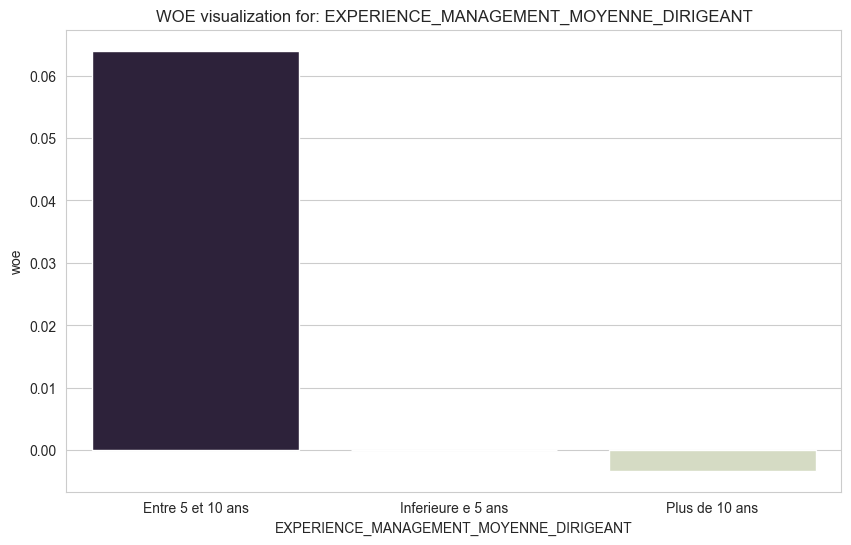

Experience_management_moyenne_dirigeant is a useless predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.00
Experience_management_moyenne_dirigeant is a useless predictor


,DIVERSITE_CLIENTS,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Bonne diversification par produits mais limite...,311,10.0,301.0,0.188679,0.205601,-0.016922,-0.085889,0.001453
1,Diversification limitee e un seul client ou un...,19,0.0,19.0,0.000000,0.012978,-0.012978,0.000000,-0.000000
2,"Diversification très forte par produits, clien...",1,1.0,0.0,0.018868,0.000000,0.018868,0.000000,0.000000
3,"Diversification très forte par produits,client...",1,1.0,0.0,0.018868,0.000000,0.018868,0.000000,0.000000
4,"Diversification trés forte par produits, clien...",1145,39.0,1106.0,0.735849,0.755464,-0.019615,-0.026308,0.000516
5,Forte dependance e quelques clients mais limit...,40,2.0,38.0,0.037736,0.025956,0.011780,0.374197,0.004408


Information value:  0.006377320471622916


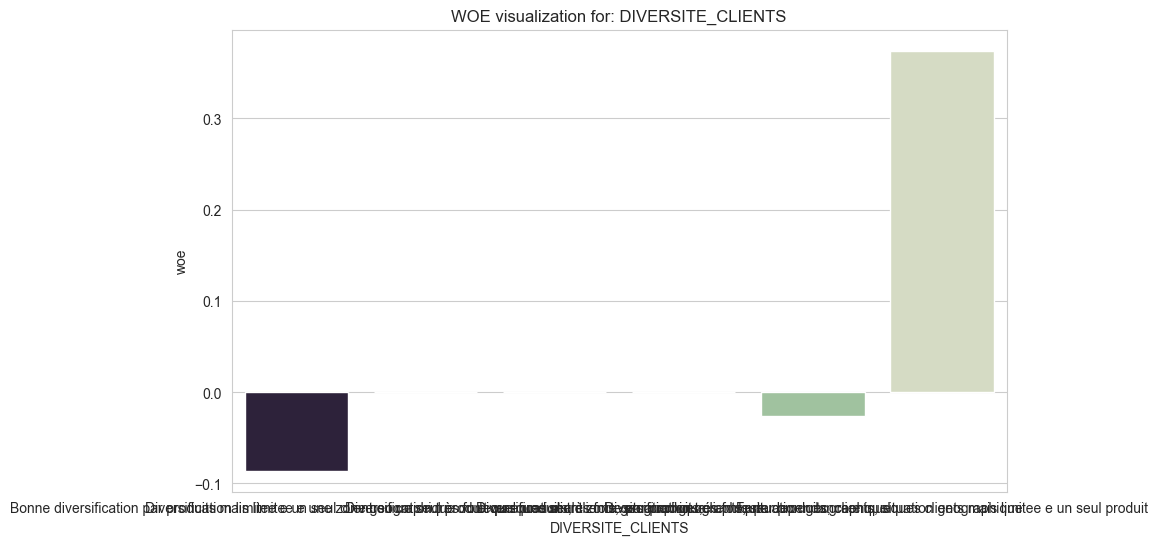

Diversite_clients is a useless predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.01
Diversite_clients is a useless predictor


,DIVERSITE_FOURNISSEURS,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Diversite insufisante,38,3.0,35.0,0.056604,0.023907,0.032697,0.861900,0.028181
1,Diversite moyenne,747,21.0,726.0,0.396226,0.495902,-0.099675,-0.224392,0.022366
2,Pas de diversite,33,1.0,32.0,0.018868,0.021858,-0.002990,-0.147100,0.000440
3,Très grande diversite,699,28.0,671.0,0.528302,0.458333,0.069969,0.142071,0.009941


Information value:  0.060927904890012236


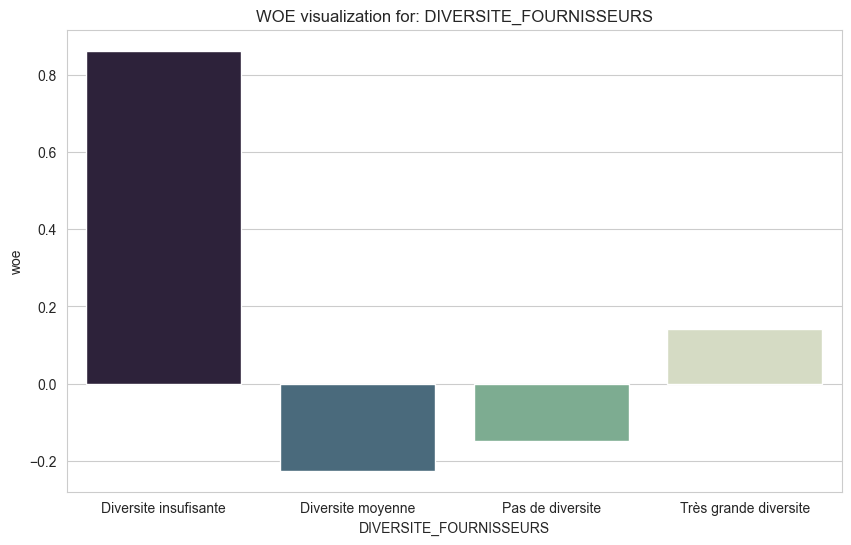

Diversite_fournisseurs is a weak predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.06
Diversite_fournisseurs is a weak predictor


,IMPACT_SOCIAUX_ENVIRONNEMENTAL,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Aucun impact,1,1.0,0.0,0.018868,0.000000,0.018868,0.000000,0.000000
1,"Aucun impact social ou environnemental, soumis...",1025,41.0,984.0,0.773585,0.672131,0.101454,0.140582,0.014263
2,Fort impact social ou environnemental irrevers...,34,2.0,32.0,0.037736,0.021858,0.015878,0.546047,0.008670
3,Impact social ou environnemental marginal,368,6.0,362.0,0.113208,0.247268,-0.134060,-0.781249,0.104734
4,Impact social ou environnemental potentiel mai...,89,3.0,86.0,0.056604,0.058743,-0.002139,-0.037099,0.000079


Information value:  0.1277464334225612


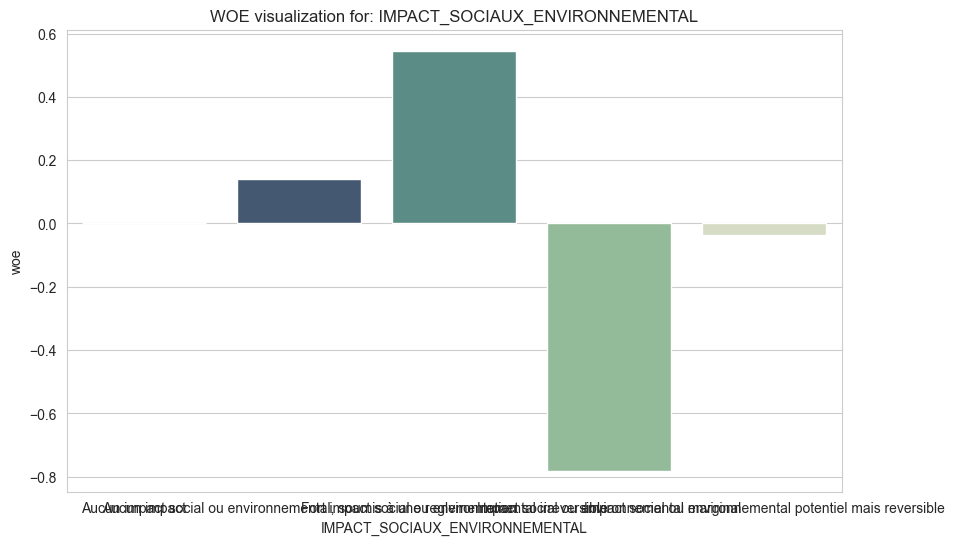

Impact_sociaux_environnemental is a medium predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.13
Impact_sociaux_environnemental is a medium predictor


,NIVEAU_COMPETITIVITE,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Absence de concurrence (quasi monopole),128,2.0,126.0,0.037736,0.086066,-0.048330,-0.824499,0.039848
1,Forte presence de produits similaires et compe...,352,17.0,335.0,0.320755,0.228825,0.091930,0.337719,0.031046
2,Quelques competiteurs majeurs identifies,920,27.0,893.0,0.509434,0.609973,-0.100539,-0.180114,0.018108
3,Très forte concurrence,117,7.0,110.0,0.132075,0.075137,0.056939,0.564066,0.032117


Information value:  0.1211198091528291


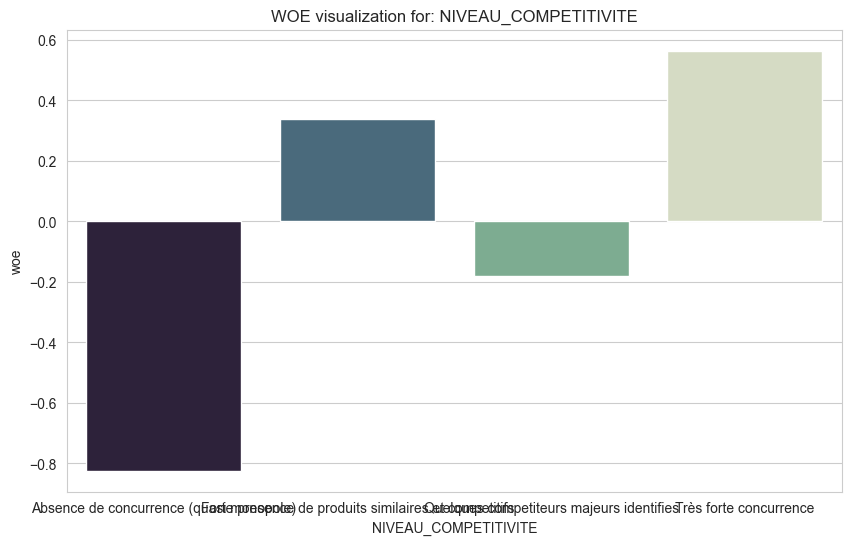

Niveau_competitivite is a medium predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.12
Niveau_competitivite is a medium predictor


,QUALITE_INFORMATION_FINANCIERE,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Etats comptables et financiers audites par un ...,1445,49.0,1396.0,0.924528,0.953552,-0.029024,-0.030910,0.000897
1,Etats comptables et financiers coherents mais ...,61,3.0,58.0,0.056604,0.039617,0.016986,0.356805,0.006061
2,Etats comptables et financiers peu fiables ou ...,7,1.0,6.0,0.018868,0.004098,0.014770,1.526876,0.022551
3,Etats comptables et financiers sommaires,4,0.0,4.0,0.000000,0.002732,-0.002732,0.000000,-0.000000


Information value:  0.029509216170368353


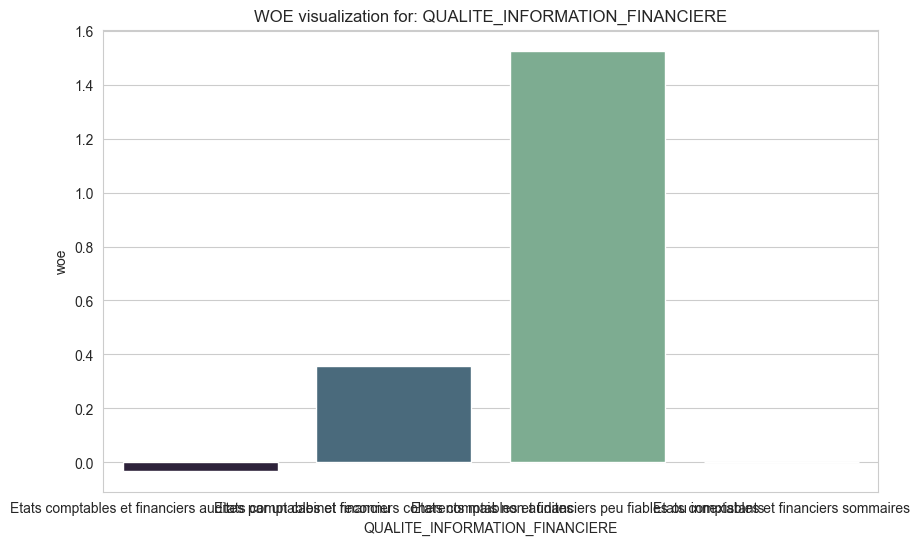

Qualite_information_financiere is a weak predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.03
Qualite_information_financiere is a weak predictor


,REPUTATION,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Bonne,406,15.0,391.0,0.283019,0.267077,0.015942,0.057978,0.000924
1,Mauvaise,4,1.0,3.0,0.018868,0.002049,0.016819,2.220023,0.037338
2,Moyenne,26,1.0,25.0,0.018868,0.017077,0.001791,0.099760,0.000179
3,Très bonne,1081,36.0,1045.0,0.679245,0.713798,-0.034553,-0.049617,0.001714


Information value:  0.040155440888823904


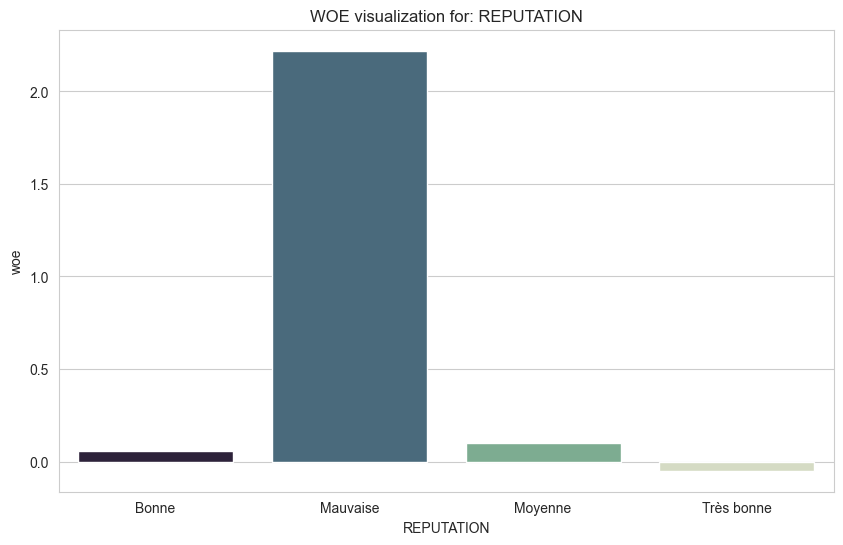

Reputation is a weak predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.04
Reputation is a weak predictor


,STRUCTUREDUMANAGEMENT,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Bien structure,1369,49.0,1320.0,0.924528,0.901639,0.022889,0.025069,0.000574
1,Moyennement structure,126,3.0,123.0,0.056604,0.084016,-0.027413,-0.394936,0.010826
2,Pas structure,17,1.0,16.0,0.018868,0.010929,0.007939,0.546047,0.004335
3,Peu structure,5,0.0,5.0,0.000000,0.003415,-0.003415,0.000000,-0.000000


Information value:  0.015735090276198974


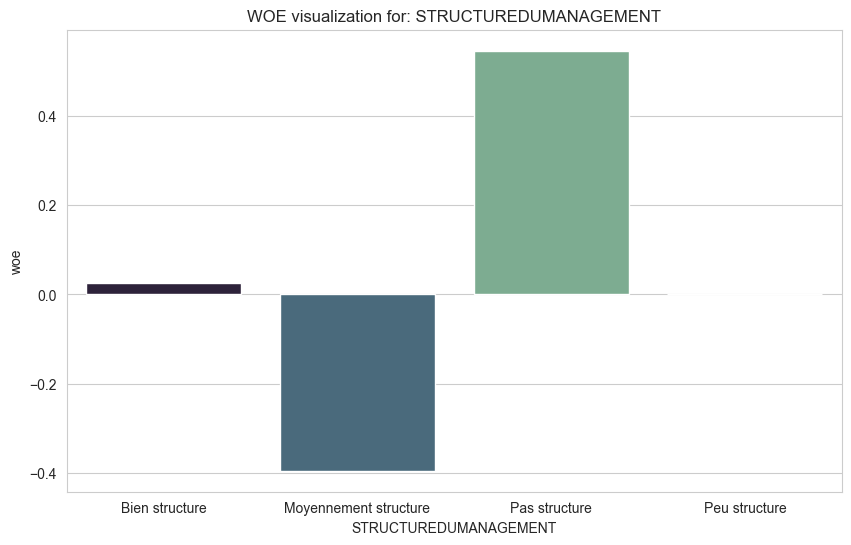

Structuredumanagement is a useless predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.02
Structuredumanagement is a useless predictor


,SUPPORT,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Absence de support des actionnaires,53,3.0,50.0,0.056604,0.034153,0.022451,0.505225,0.011343
1,Lettre de confort de la maison mere,207,6.0,201.0,0.113208,0.137295,-0.024088,-0.192910,0.004647
2,Support conforme aux attentes,1240,44.0,1196.0,0.830189,0.816940,0.013249,0.016087,0.000213
3,Support occasionnel ou insuffisant,17,0.0,17.0,0.000000,0.011612,-0.011612,0.000000,-0.000000


Information value:  0.016202548487260087


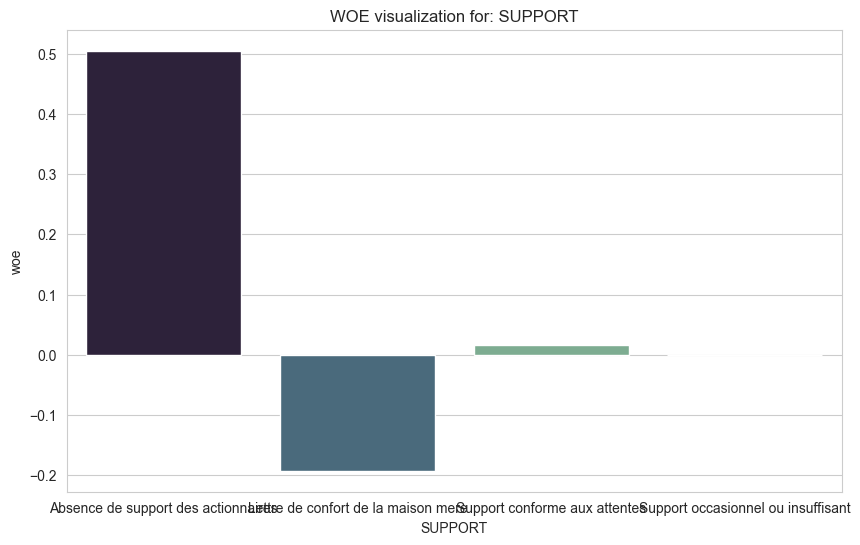

Support is a useless predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.02
Support is a useless predictor


,POSITIONNEMENTMARCHE,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Acteur majeur + de 20% de part de marche,1000,36.0,964.0,0.679245,0.658470,0.020775,0.031063,0.000645
1,Acteur marginal,9,1.0,8.0,0.018868,0.005464,0.013403,1.239194,0.016609
2,Acteur non significatif,125,3.0,122.0,0.056604,0.083333,-0.026730,-0.386773,0.010338
3,Leader,383,13.0,370.0,0.245283,0.252732,-0.007449,-0.029918,0.000223


Information value:  0.02781595947078677


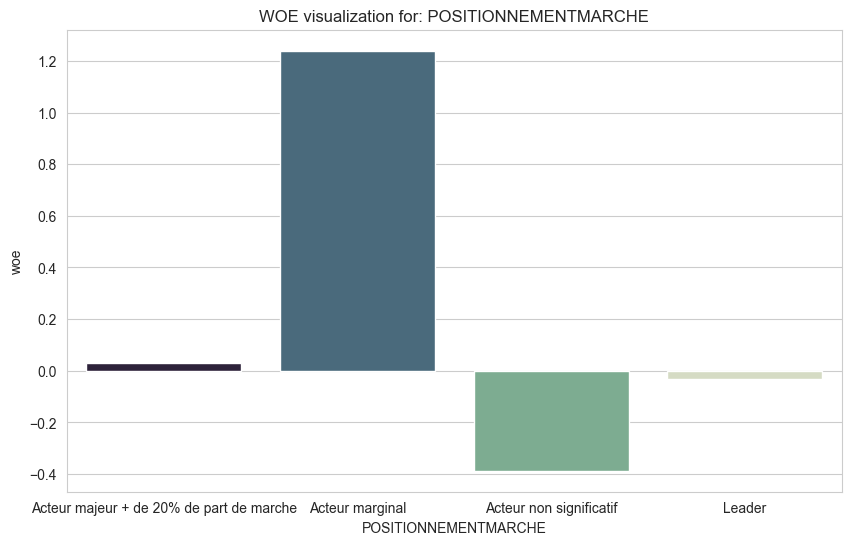

Positionnementmarche is a weak predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.03
Positionnementmarche is a weak predictor


,Categorie_juridique,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Autres forme juridique,4,0.0,4.0,0.000000,0.002732,-0.002732,0.000000,-0.000000
1,SA,1085,36.0,1049.0,0.679245,0.716530,-0.037285,-0.053438,0.001992
2,SARL,428,17.0,411.0,0.320755,0.280738,0.040017,0.133256,0.005333


Information value:  0.007324922865580997


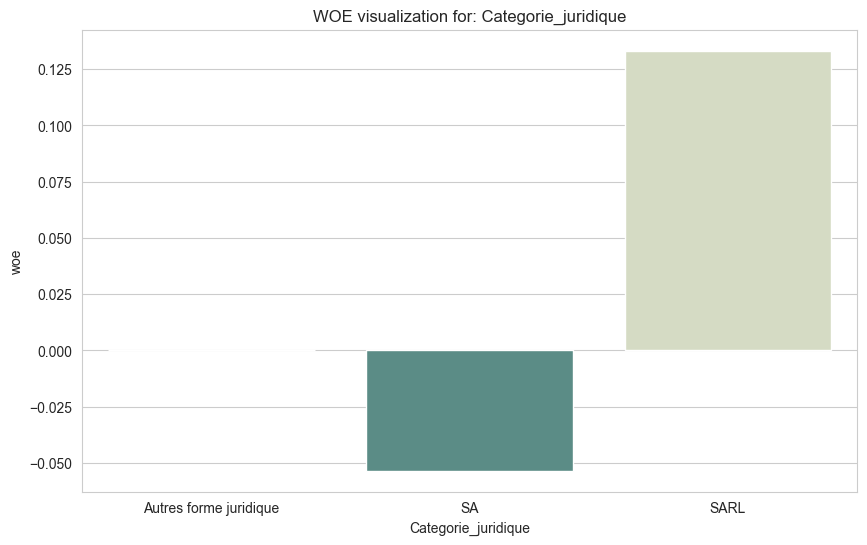

Categorie_juridique is a useless predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.01
Categorie_juridique is a useless predictor


,Secteurs,count,good,bad,perc_good,perc_bad,perc_diff,woe,iv
0,Activites financières,20,1.0,19.0,0.018868,0.012978,0.005890,0.374197,0.002204
1,Administrations publiques,1,0.0,1.0,0.000000,0.000683,-0.000683,0.000000,-0.000000
2,"Agriculture, chasse et sylviculture",9,0.0,9.0,0.000000,0.006148,-0.006148,0.000000,-0.000000
3,Autres sections,130,9.0,121.0,0.169811,0.082650,0.087161,0.720070,0.062762
4,Bâtiments et travaux publics,171,10.0,161.0,0.188679,0.109973,0.078707,0.539817,0.042487
5,"Commerce, reparations automobiles et d'article...",496,8.0,488.0,0.150943,0.333333,-0.182390,-0.792238,0.144496
6,Hôtels et restaurants,36,0.0,36.0,0.000000,0.024590,-0.024590,0.000000,-0.000000
7,Industries agroalimentaires et du tabac,188,3.0,185.0,0.056604,0.126366,-0.069762,-0.803108,0.056027
8,Industries chimiques et parachimiques,78,2.0,76.0,0.037736,0.051913,-0.014177,-0.318950,0.004522
9,"Industries du textile, de l'habillement et des...",41,2.0,39.0,0.037736,0.026639,0.011097,0.348221,0.003864


Information value:  0.5133858706846717


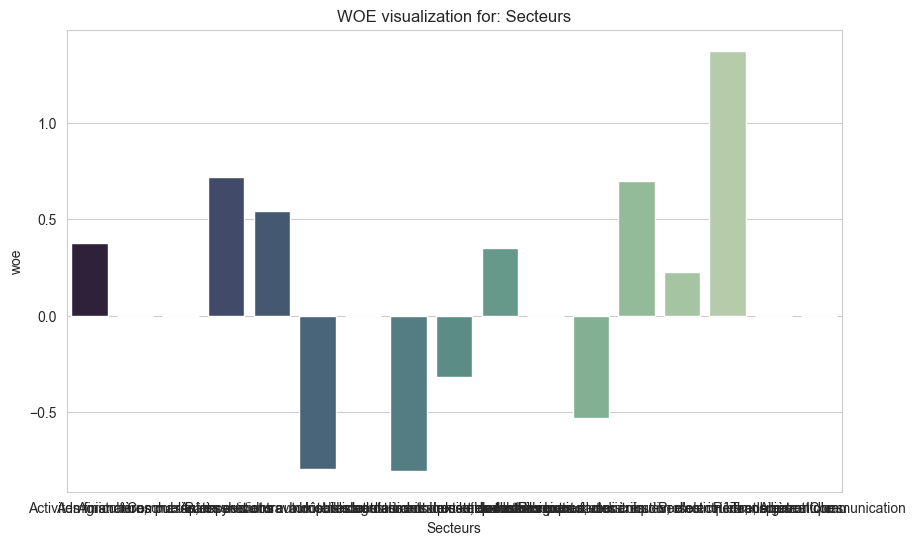

Secteurs is a suspicious predictor.
A feature with IV = 0.2 is a medium predictor.

Information value: 0.51
Secteurs is a suspicious predictor


In [51]:
df_cat=df_nouveau[['defaut']+categorical_vars]
good_cat=[]
for i in df_cat.columns[1:]:
    feat_charges = CategoricalFeature(df_cat, i)
    iv.group_by_feature(feat_charges)
    iv_df, iv_value = iv.calculate_iv(feat_charges)
    display(iv_df)
    print('Information value: ', iv_value)
    iv.draw_woe(feat_charges)
    print('%s is a %s predictor.' % (feat_charges.feature.capitalize(), iv.interpret_iv(feat_charges)))
    if iv.interpret_iv(feat_charges) not in  ['useless','suspicious','weak'] : good_cat+= [feat_charges.feature.capitalize()]

    print('A feature with IV = 0.2 is a %s predictor.' % iv.interpretation(0.2))
    print()
    iv.print_iv(feat_charges)

In [52]:
good_ratio

['Marge nette',
 'Ratio_capacite_remboursement',
 'Couverture_interets',
 'Roe',
 'Roa']

In [53]:
df_nouveau.columns

Index(['numtiers', 'Annee', 'NUMTIERS_ANNEE', 'defaut',
       'DATE_DE_CREATION_TIERS', 'DATE_DE_CREATION_ENTREP',
       'EXPERIENCE_MANAGEMENT_MOYENNE_DIRIGEANT', 'DIVERSITE_CLIENTS',
       'DIVERSITE_FOURNISSEURS', 'IMPACT_SOCIAUX_ENVIRONNEMENTAL',
       'NIVEAU_COMPETITIVITE', 'QUALITE_INFORMATION_FINANCIERE', 'REPUTATION',
       'STRUCTUREDUMANAGEMENT', 'SUPPORT', 'POSITIONNEMENTMARCHE',
       'Categorie_juridique', 'Secteurs', 'Ratio de Liquidité Générale',
       'Rotation des Stocks', 'Ratio dEndettement', 'Marge Nette',
       'Taille_entreprise', 'Ratio_capacite_remboursement',
       'Liquidite_reduite', 'Couverture_interets', 'Ratio_autonomie', 'ROE',
       'ROA'],
      dtype='object')

In [54]:
good_ratio[0]="Marge Nette"
good_ratio[3]="ROE"
good_ratio[4]="ROA"


In [55]:
good_cat

['Impact_sociaux_environnemental', 'Niveau_competitivite']

In [56]:
good_cat[0]="IMPACT_SOCIAUX_ENVIRONNEMENTAL"
good_cat[1]="NIVEAU_COMPETITIVITE"

In [57]:
# Select specific columns
final_df = df_nouveau[['Annee', 'defaut'] + good_ratio + good_cat]

In [58]:
final_df

,Annee,defaut,Marge Nette,Ratio_capacite_remboursement,Couverture_interets,ROE,ROA,IMPACT_SOCIAUX_ENVIRONNEMENTAL,NIVEAU_COMPETITIVITE
0,2015,0.0,-5.535762,0.589600,0.589600,-14.859481,-6.003275,Impact social ou environnemental potentiel mai...,Quelques competiteurs majeurs identifies
1,2016,0.0,0.894964,0.858853,0.858853,2.388908,1.112068,Impact social ou environnemental marginal,Très forte concurrence
2,2015,0.0,-0.204160,2.920095,2.920095,-1.602681,-0.548020,"Aucun impact social ou environnemental, soumis...",Absence de concurrence (quasi monopole)
3,2017,0.0,3.556814,8.536753,8.536753,17.191970,10.966188,"Aucun impact social ou environnemental, soumis...",Forte presence de produits similaires et compe...
4,2015,0.0,0.814611,2.533170,2.533170,2.746963,0.800352,"Aucun impact social ou environnemental, soumis...",Quelques competiteurs majeurs identifies
...,...,...,...,...,...,...,...,...,...
1512,2019,0.0,0.273670,16.632644,16.632644,6.446680,0.528947,"Aucun impact social ou environnemental, soumis...",Quelques competiteurs majeurs identifies
1513,2016,0.0,0.235478,1.942176,1.942176,40.746799,6.236660,"Aucun impact social ou environnemental, soumis...",Absence de concurrence (quasi monopole)
1514,2018,1.0,10.961787,12.050156,12.050156,18.477356,8.612388,"Aucun impact social ou environnemental, soumis...",Très forte concurrence
1515,2019,1.0,-1.058109,1.751412,1.751412,-2.065453,-0.420828,"Aucun impact social ou environnemental, soumis...",Quelques competiteurs majeurs identifies


In [59]:
# Créer une nouvelle DataFrame avec les colonnes discrétisées
discretized_df = pd.DataFrame()
# Discrétiser chaque variable avec pd.qcut
# Discrétiser chaque variable avec pd.qcut et ajouter des labels 0, 1, 2, 3
discretized_df['Marge nette discret'] = pd.qcut(final_df['Marge Nette'], q=2, labels=[0, 1])
discretized_df['Ratio_capacite_remboursement discret'] = pd.qcut(final_df['Ratio_capacite_remboursement'], q=3, labels=[0, 1,2])
discretized_df['Couverture_interets discret'] = pd.qcut(final_df['Couverture_interets'], q=2, labels=[0, 1])
discretized_df['Roe discret'] = pd.qcut(final_df['ROE'], q=2, labels=[0, 1])
discretized_df['Roa discret'] = pd.qcut(final_df['ROA'], q=2, labels=[0, 1])
# Concaténer les deux DataFrames
new_df = pd.concat([df_nouveau[['Annee', 'defaut']], discretized_df, df_nouveau[good_cat]], axis=1)



In [60]:
new_df

,Annee,defaut,Marge nette discret,Ratio_capacite_remboursement discret,Couverture_interets discret,Roe discret,Roa discret,IMPACT_SOCIAUX_ENVIRONNEMENTAL,NIVEAU_COMPETITIVITE
0,2015,0.0,0,0,0,0,0,Impact social ou environnemental potentiel mai...,Quelques competiteurs majeurs identifies
1,2016,0.0,0,0,0,0,0,Impact social ou environnemental marginal,Très forte concurrence
2,2015,0.0,0,1,0,0,0,"Aucun impact social ou environnemental, soumis...",Absence de concurrence (quasi monopole)
3,2017,0.0,1,2,1,1,1,"Aucun impact social ou environnemental, soumis...",Forte presence de produits similaires et compe...
4,2015,0.0,0,1,0,0,0,"Aucun impact social ou environnemental, soumis...",Quelques competiteurs majeurs identifies
...,...,...,...,...,...,...,...,...,...
1512,2019,0.0,0,2,1,0,0,"Aucun impact social ou environnemental, soumis...",Quelques competiteurs majeurs identifies
1513,2016,0.0,0,0,0,1,1,"Aucun impact social ou environnemental, soumis...",Absence de concurrence (quasi monopole)
1514,2018,1.0,1,2,1,1,1,"Aucun impact social ou environnemental, soumis...",Très forte concurrence
1515,2019,1.0,0,0,0,0,0,"Aucun impact social ou environnemental, soumis...",Quelques competiteurs majeurs identifies


In [61]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame to avoid modifying the original
final_df_encoded = new_df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column except 'Annee'
for col in final_df_encoded.select_dtypes(include=['object']).columns:
    if col != 'Annee':  # Skip the 'Annee' column
        final_df_encoded[col] = label_encoder.fit_transform(final_df_encoded[col])


In [62]:
final_df_encoded

,Annee,defaut,Marge nette discret,Ratio_capacite_remboursement discret,Couverture_interets discret,Roe discret,Roa discret,IMPACT_SOCIAUX_ENVIRONNEMENTAL,NIVEAU_COMPETITIVITE
0,2015,0.0,0,0,0,0,0,4,2
1,2016,0.0,0,0,0,0,0,3,3
2,2015,0.0,0,1,0,0,0,1,0
3,2017,0.0,1,2,1,1,1,1,1
4,2015,0.0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
1512,2019,0.0,0,2,1,0,0,1,2
1513,2016,0.0,0,0,0,1,1,1,0
1514,2018,1.0,1,2,1,1,1,1,3
1515,2019,1.0,0,0,0,0,0,1,2


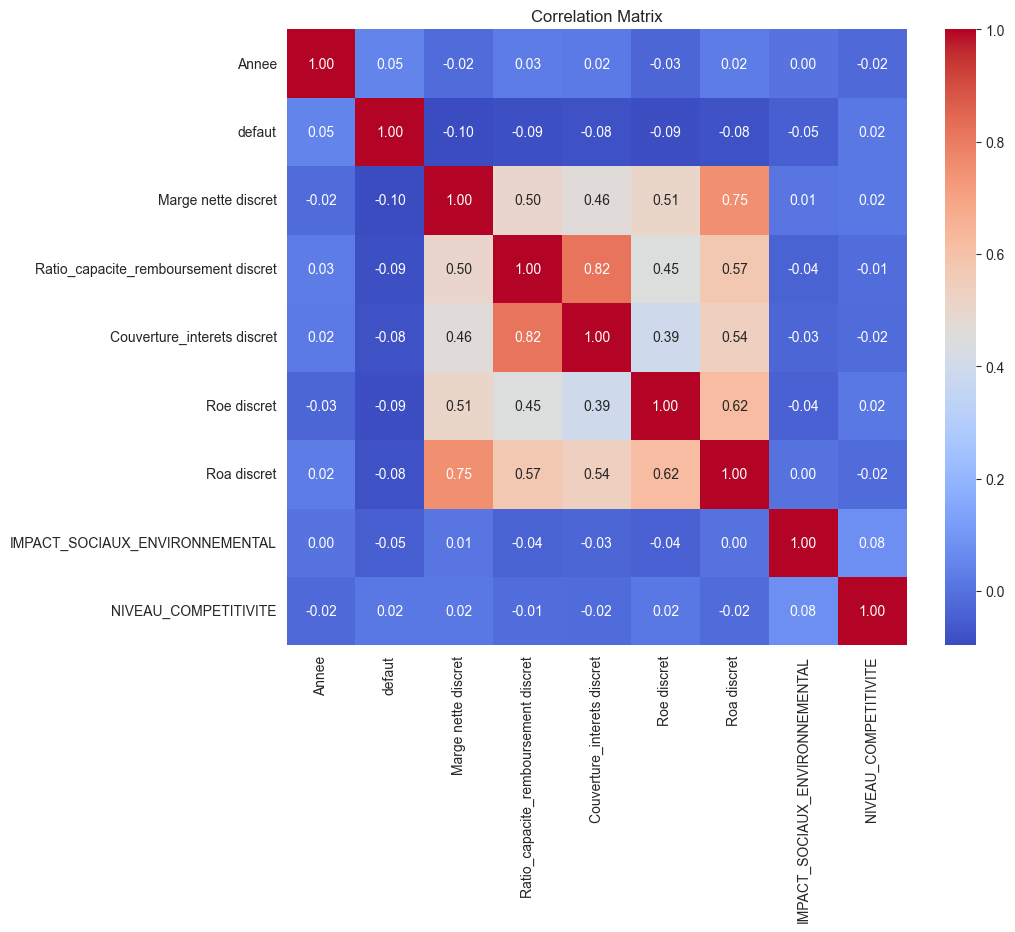

In [63]:
# Calculate correlation matrix
correlation_matrix = final_df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [64]:
# Delete the 'Marge nette discret' column
final_df_encoded.drop(columns=['Marge nette discret'], inplace=True)


In [65]:
final_df_encoded.drop(columns=['Roe discret'], inplace=True)


In [66]:
final_df_encoded.drop(columns=['Couverture_interets discret'], inplace=True)

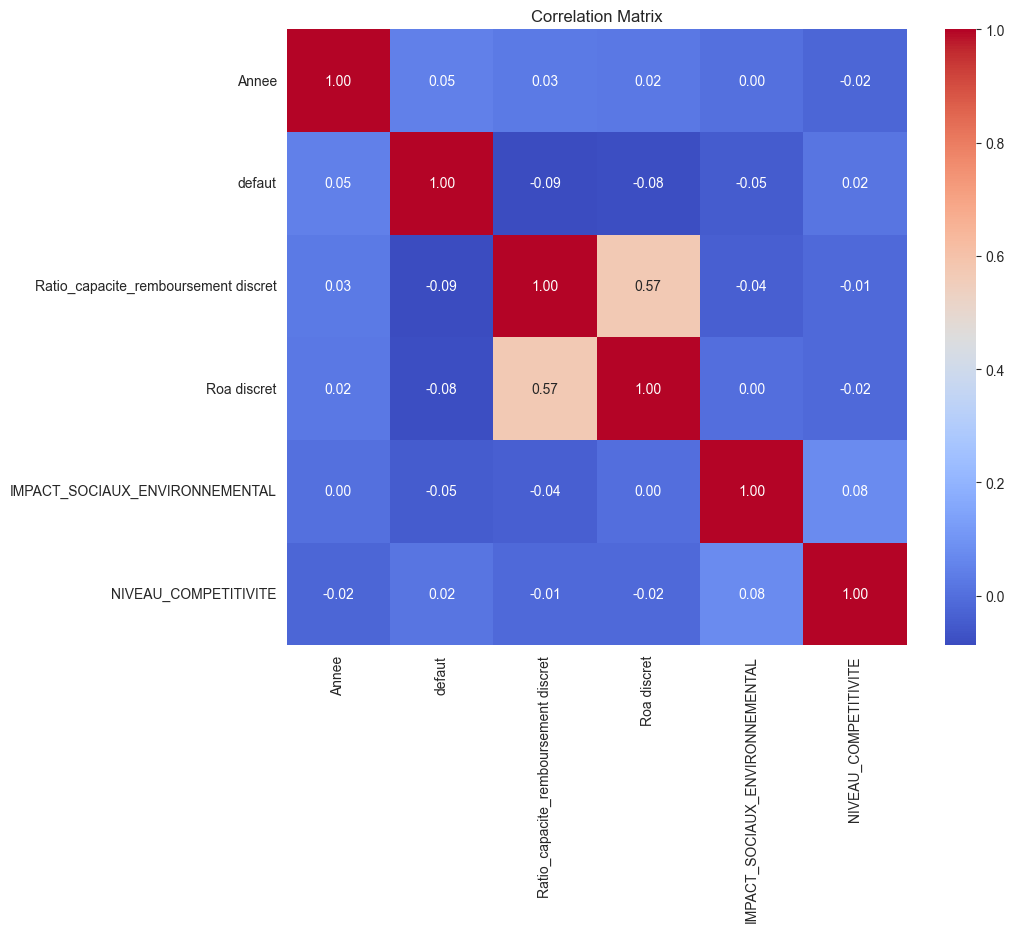

In [67]:
# Calculate correlation matrix
correlation_matrix = final_df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [68]:
# Calculate the index from which 20% of the data will be used for testing
test_index = int(0.8 * len(final_df_encoded))

# Divide the data into training and testing datasets
train_data = final_df_encoded.iloc[:test_index]
test_data = final_df_encoded.iloc[test_index:]

# Separate features and target for training and testing sets
X_train = train_data.drop('defaut', axis=1)
y_train = train_data['defaut']
X_test = test_data.drop('defaut', axis=1)
y_test = test_data['defaut']

# Now you have X_train, X_test, y_train, y_test for training and testing respectively


In [69]:
X_train['defaut'] = y_train
X_test['defaut'] = y_test

In [70]:
from lifelines import CoxPHFitter 
# Create Model
cph = CoxPHFitter()

# Fit the data to train the model
cph.fit(X_train,duration_col='Annee', event_col='defaut')

# Have a look at the significance of the features
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1213 total observations, 1171 right-censored observations>
             duration col = 'Annee'
                event col = 'defaut'
      baseline estimation = breslow
   number of observations = 1213
number of events observed = 42
   partial log-likelihood = -254.98
         time fit was run = 2024-05-10 19:57:14 UTC

---
                                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                    
Ratio_capacite_remboursement discret  -0.24       0.78       0.24            -0.72             0.24                 0.49                 1.27
Roa discret                           -0.82       0.44       0.42            -1.64            -0.00                 0.19                 1.00
IMPACT_SOCIAUX_ENVIRONNEMENTAL        -0.22       0.80       0.17            -0.55             0.11                 0.58                 1.12
NIVEAU_COMPETITIVITE                   0.19       1.20       0.22            -0.24             0.61                 0.79                 1.85

                                       cmp to     z    p   -log2(p)
covariate                                                          
Ratio_capacite_remboursement discret     0.00 -0.99 0.32       1.64
Roa discret                              0.00 -1.97 0.05       4.35
IMPACT_SOCIAUX_ENVIRONNEMENTAL           0.00 -1.31 0.19       2.40
NIVEAU_COMPETITIVITE                     0.00  0.86 0.39       1.35
---
Concordance = 0.69
Partial AIC = 517.96
log-likelihood ratio test = 13.84 on 4 df
-log2(p) of ll-ratio test = 7.00

In [71]:
from lifelines.statistics import proportional_hazard_test
results = proportional_hazard_test(cph, X_train, time_transform='rank')
results.print_summary(decimals=3, model="untransformed variables")

<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 1213 total observations, 1171 right-censored observations>
         test_name = proportional_hazard_test

---
                                      test_statistic    p  -log2(p)
IMPACT_SOCIAUX_ENVIRONNEMENTAL                  0.79 0.38      1.41
NIVEAU_COMPETITIVITE                            0.84 0.36      1.48
Ratio_capacite_remboursement discret            1.92 0.17      2.60
Roa discret                                     0.11 0.74      0.43

In [72]:
# Make predictions on the test set
predicted_defaut_test = cph.predict_expectation(X_test)

# Display the predictions
print(predicted_defaut_test)


1213    3.948961
1214    3.947205
1215    3.947205
1216    3.953603
1217    3.947205
          ...   
1512    3.818599
1513    3.908992
1514    3.902079
1515    3.712624
1516    3.763811
Length: 304, dtype: float64


In [73]:
test_predictions = cph.predict_expectation(X_test)

In [74]:
# Add the predicted survival times to the test set
test_set_with_predictions = X_test.assign(predicted_survival=test_predictions.values)

# Sort the individuals by predicted survival time
sorted_test_set = test_set_with_predictions.sort_values(by='predicted_survival')

sorted_test_set

,Annee,Ratio_capacite_remboursement discret,Roa discret,IMPACT_SOCIAUX_ENVIRONNEMENTAL,NIVEAU_COMPETITIVITE,defaut,predicted_survival
1295,2018,0,0,1,3,0.0,3.658142
1264,2018,0,0,1,3,1.0,3.658142
1325,2017,0,0,1,3,0.0,3.658142
1388,2017,0,0,1,2,0.0,3.712624
1387,2015,0,0,1,2,0.0,3.712624
...,...,...,...,...,...,...,...
1219,2015,2,1,3,1,0.0,3.956099
1250,2019,2,1,3,1,0.0,3.956099
1464,2019,2,1,3,1,0.0,3.956099
1389,2016,2,1,3,1,0.0,3.956099
